# PRÁCTICA 2 Spotify Tracks Dataset 

## Análisis exploratorio

Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el Dataset y examinamos todas las variables

In [2]:
# Leer el dataset
df = pd.read_csv("spotify_tracks.csv")

# Información general del dataset
print("Información del Dataset:")
print(df.info())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness    

Verificamos la distribución de cada variable 

In [3]:
# Resumen estadístico
print("\nResumen Estadístico:")
print(df.describe())


Resumen Estadístico:
               year    popularity  acousticness  danceability   duration_ms  \
count  62317.000000  62317.000000  62317.000000  62317.000000  6.231700e+04   
mean    2014.425935     15.358361      0.362292      0.596807  2.425270e+05   
std        9.645113     18.626908      0.314609      0.186209  1.129999e+05   
min     1971.000000      0.000000     -1.000000     -1.000000  5.000000e+03   
25%     2011.000000      0.000000      0.067100      0.497000  1.921600e+05   
50%     2017.000000      7.000000      0.286000      0.631000  2.362670e+05   
75%     2022.000000     26.000000      0.632000      0.730000  2.862400e+05   
max     2024.000000     93.000000      0.996000      0.986000  4.581483e+06   

             energy  instrumentalness           key      liveness  \
count  62317.000000      62317.000000  62317.000000  62317.000000   
mean       0.602496          0.146215      5.101658      0.194143   
std        0.246144          0.307804      3.553469      0.

In [4]:
df = df.drop(columns=['mode'])

Averiguar si tiene valores nulos

In [5]:
# Verificar valores nulos
print("\nValores Nulos:")
print(df.isnull().sum())


Valores Nulos:
track_id            0
track_name          0
artist_name         0
year                0
popularity          0
artwork_url         0
album_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
track_url           0
language            0
dtype: int64


Convertimos la duración en milisegundos a minutos

In [6]:
df['duration_min'] = df['duration_ms'] / (1000 * 60)

# Mostrar las primeras filas con la nueva columna
print(df[['duration_ms', 'duration_min']].head())

   duration_ms  duration_min
0      97297.0      1.621617
1     207369.0      3.456150
2      82551.0      1.375850
3     115831.0      1.930517
4     129621.0      2.160350


Ahora borramos la columna duration_ms

In [7]:
df = df.drop(columns=['duration_ms'])

### Visualización de las variables

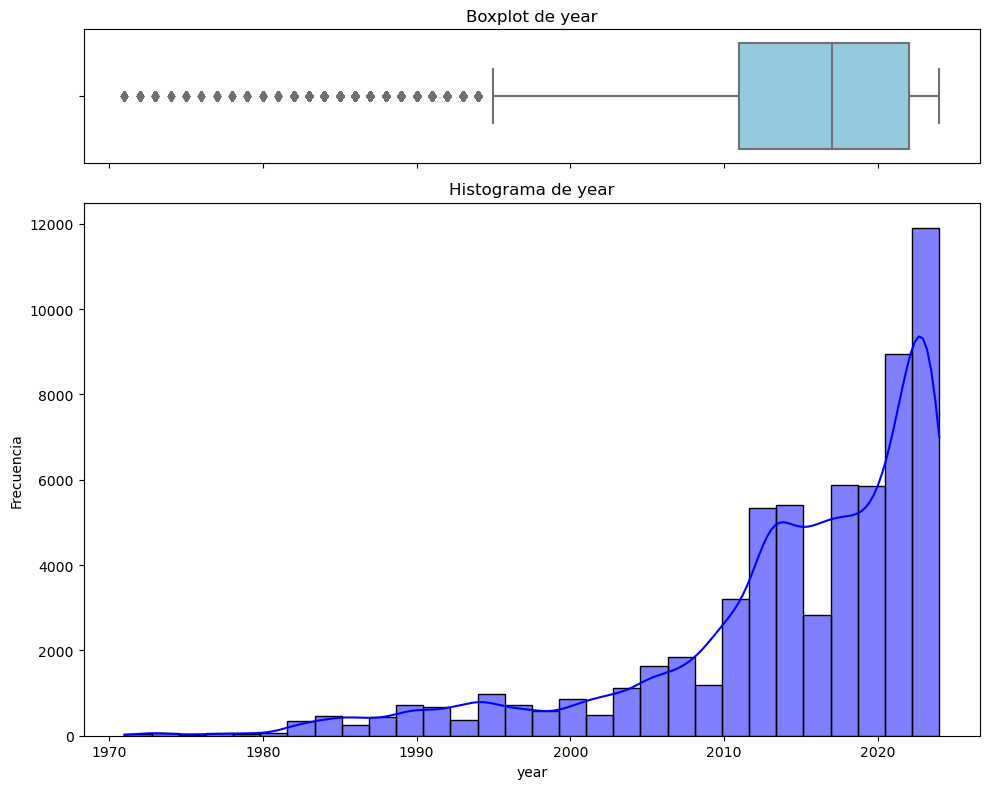

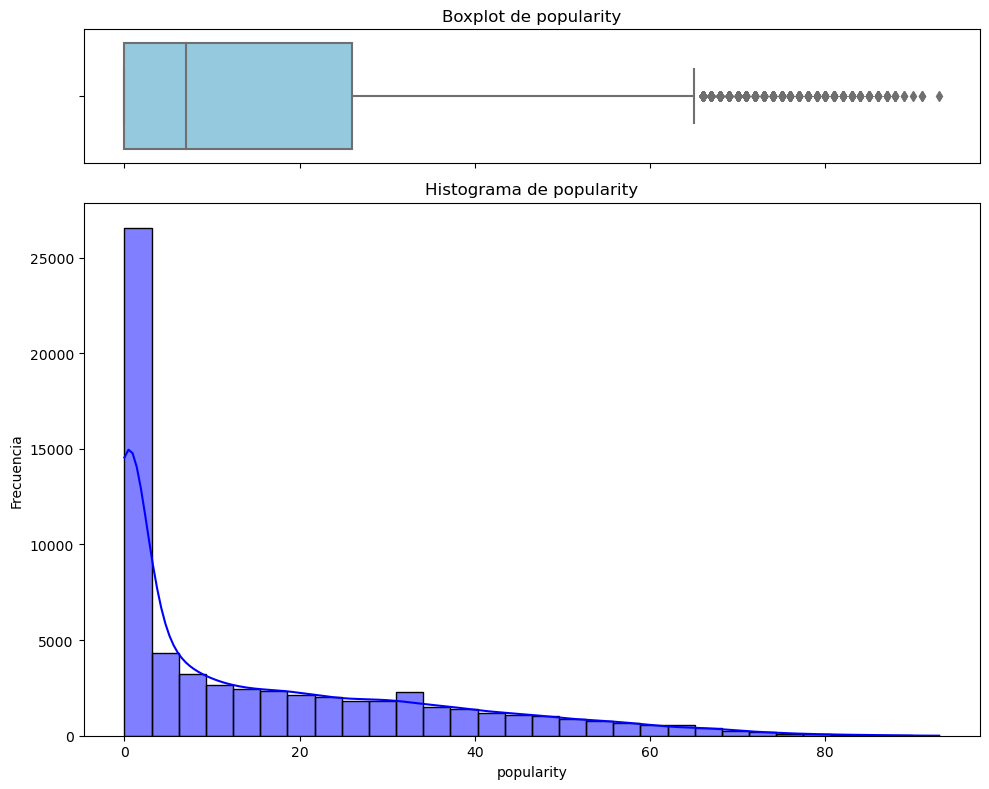

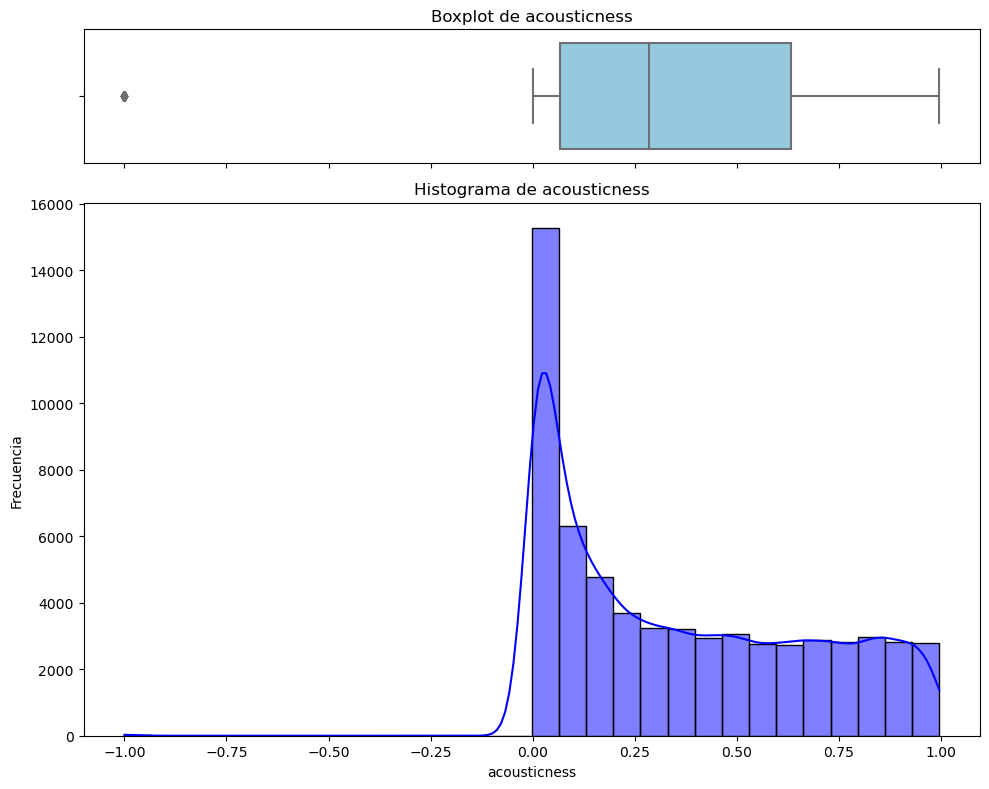

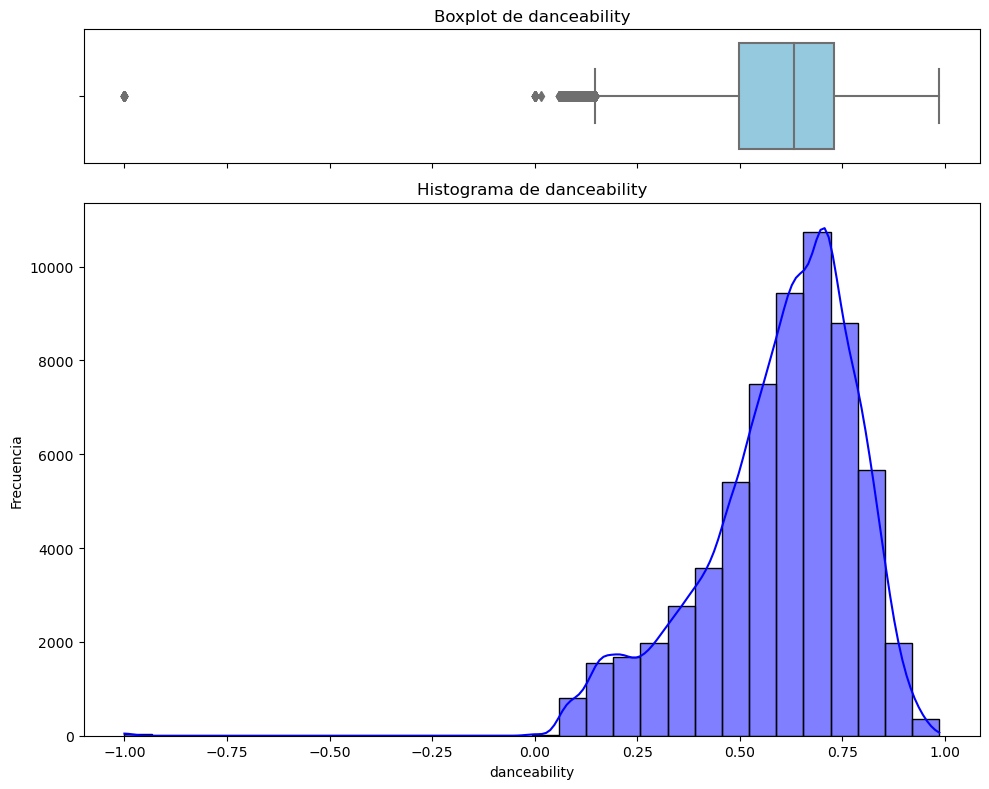

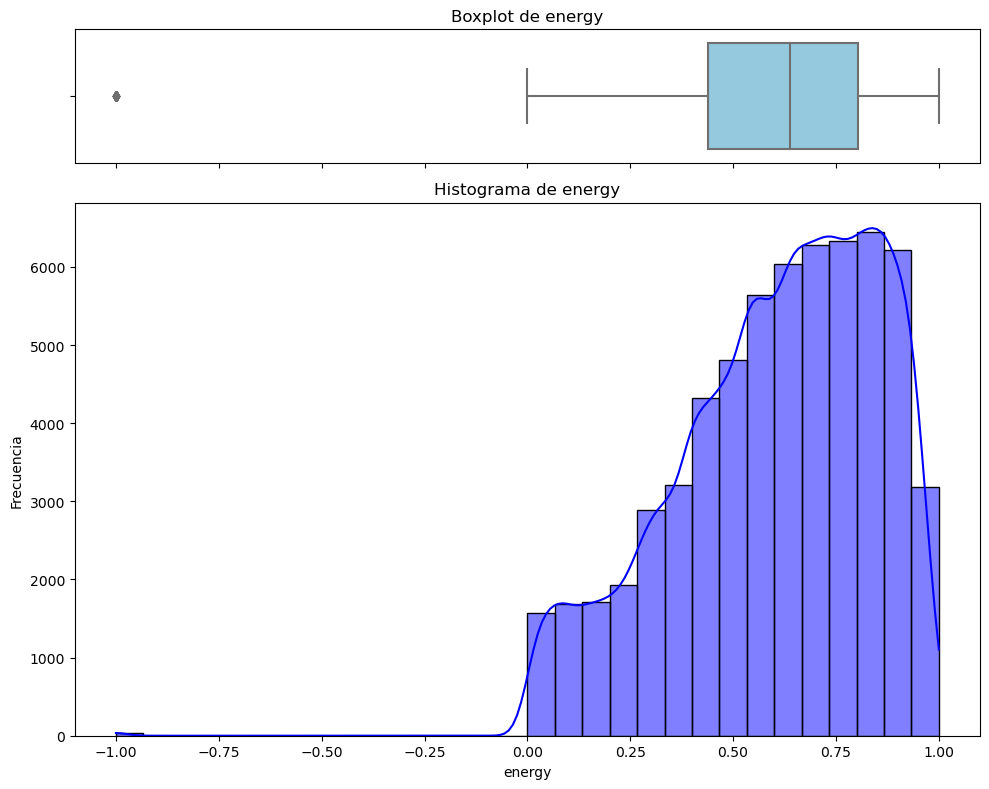

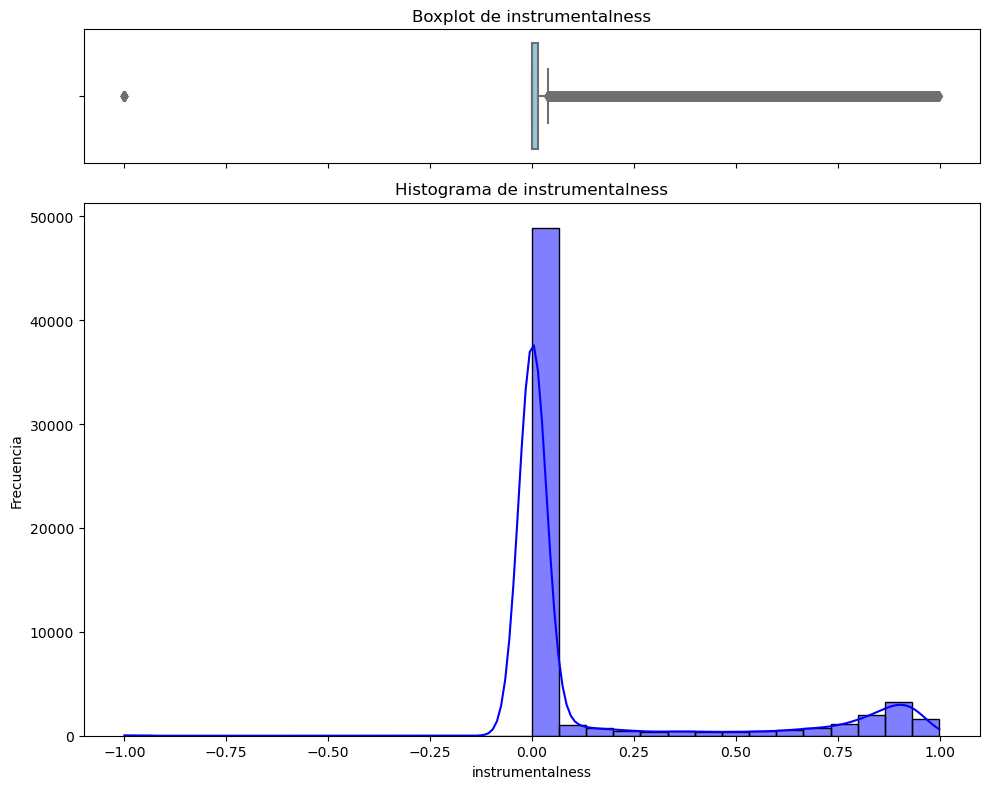

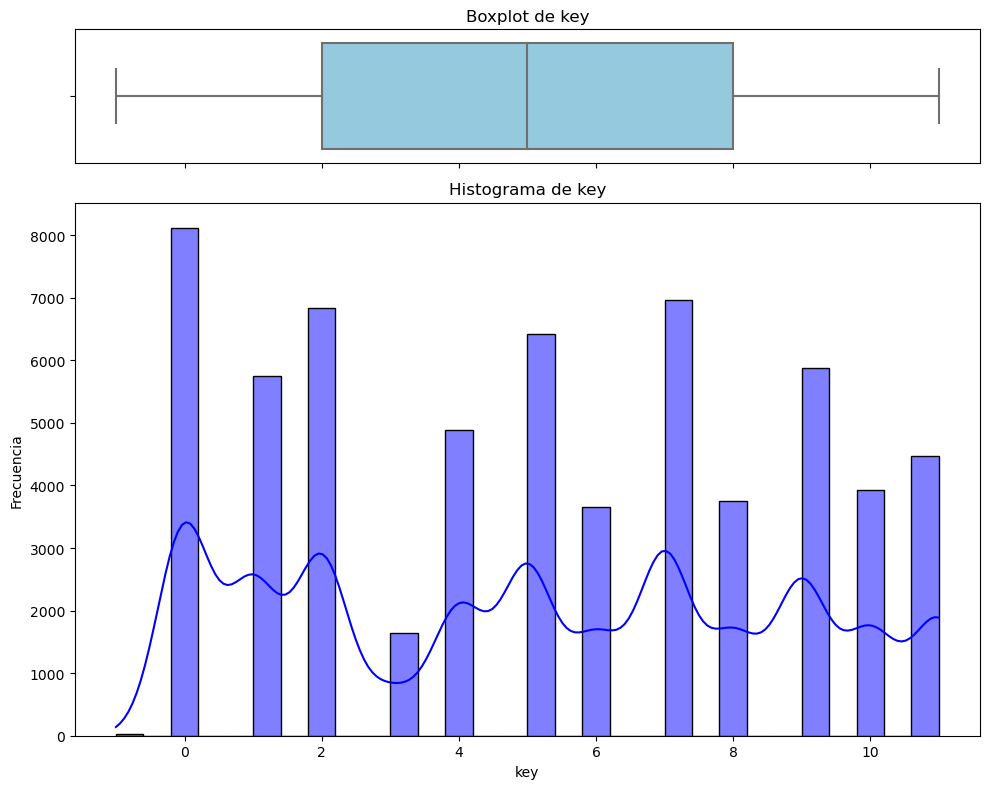

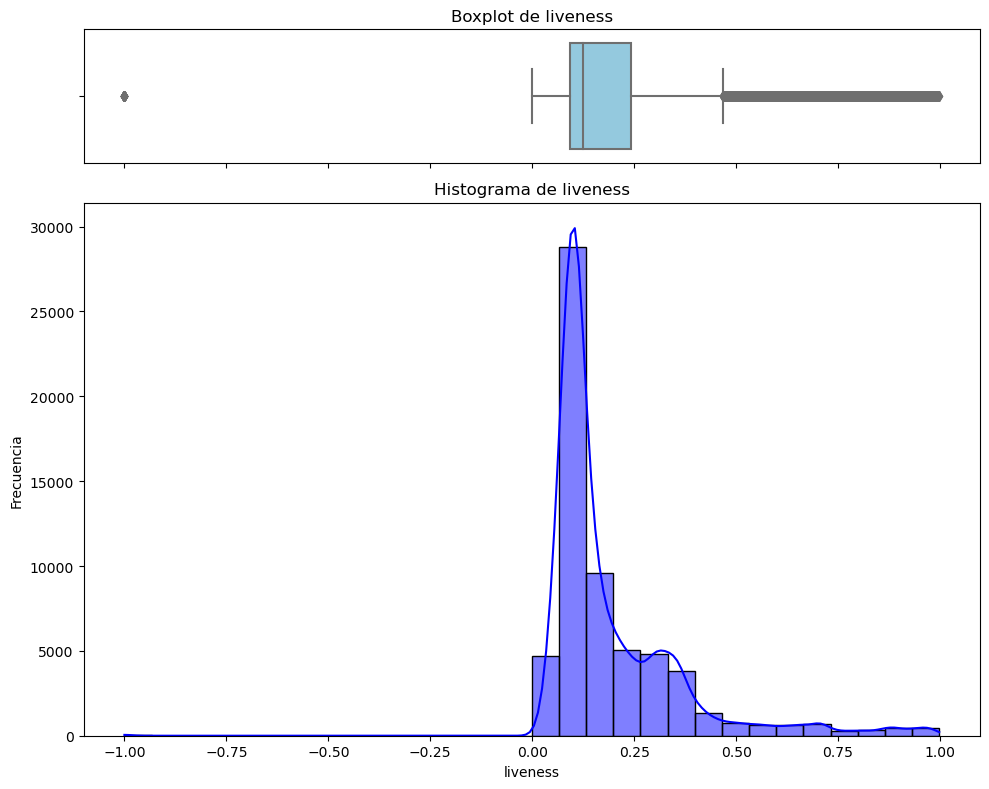

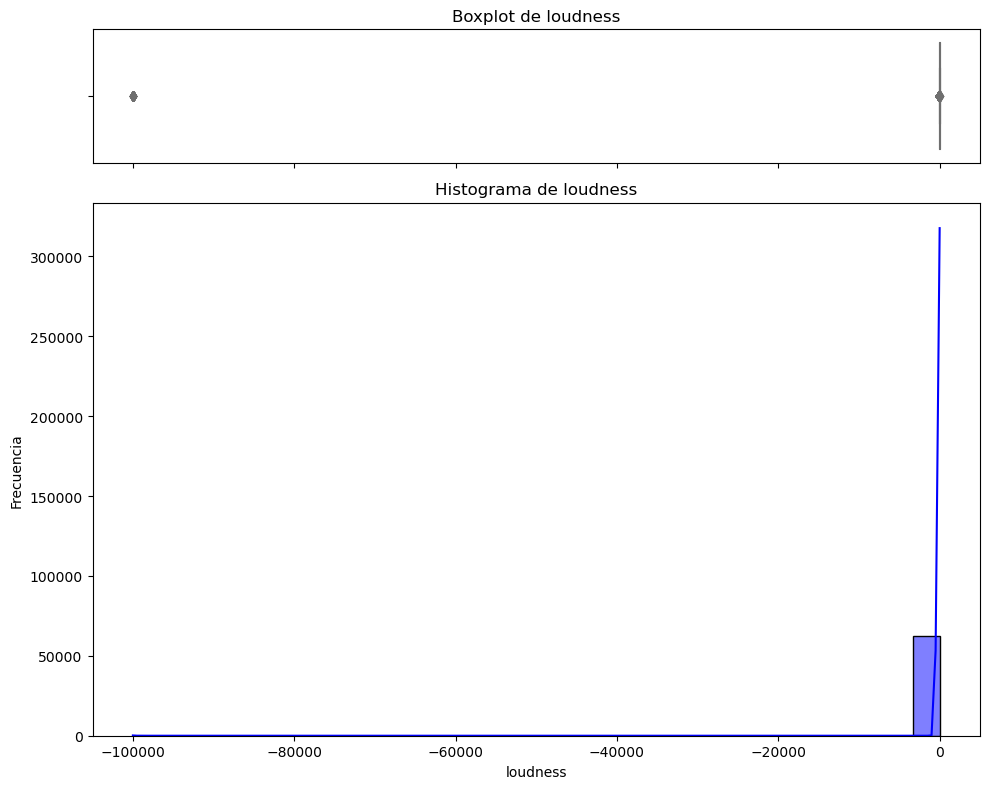

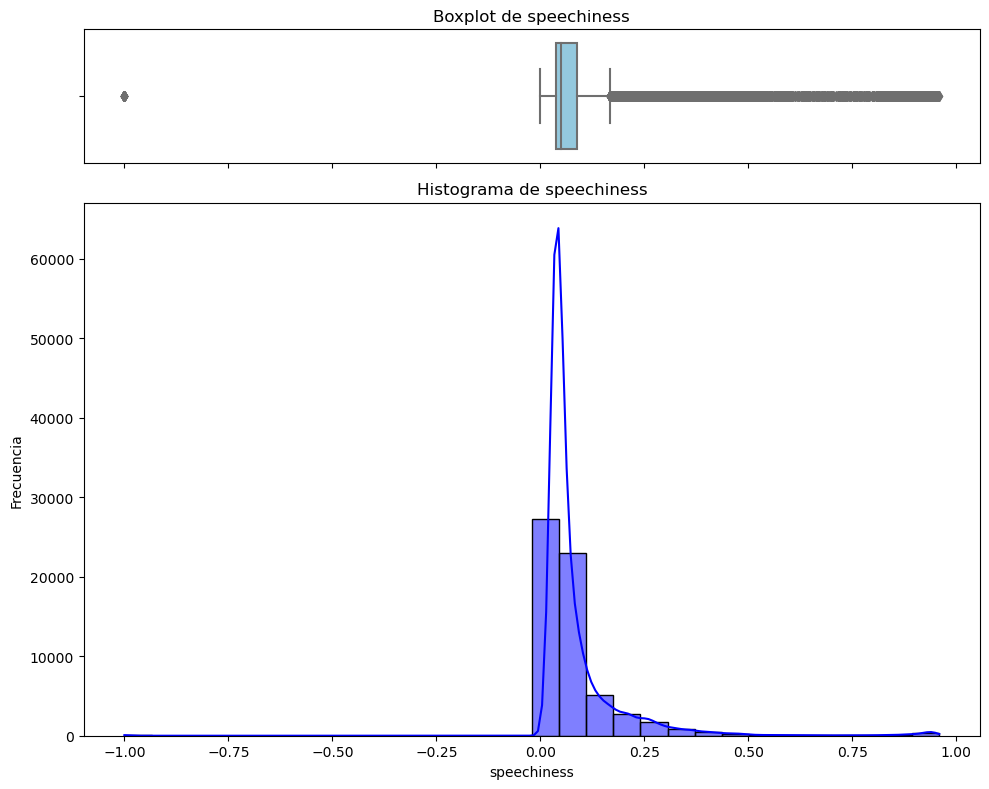

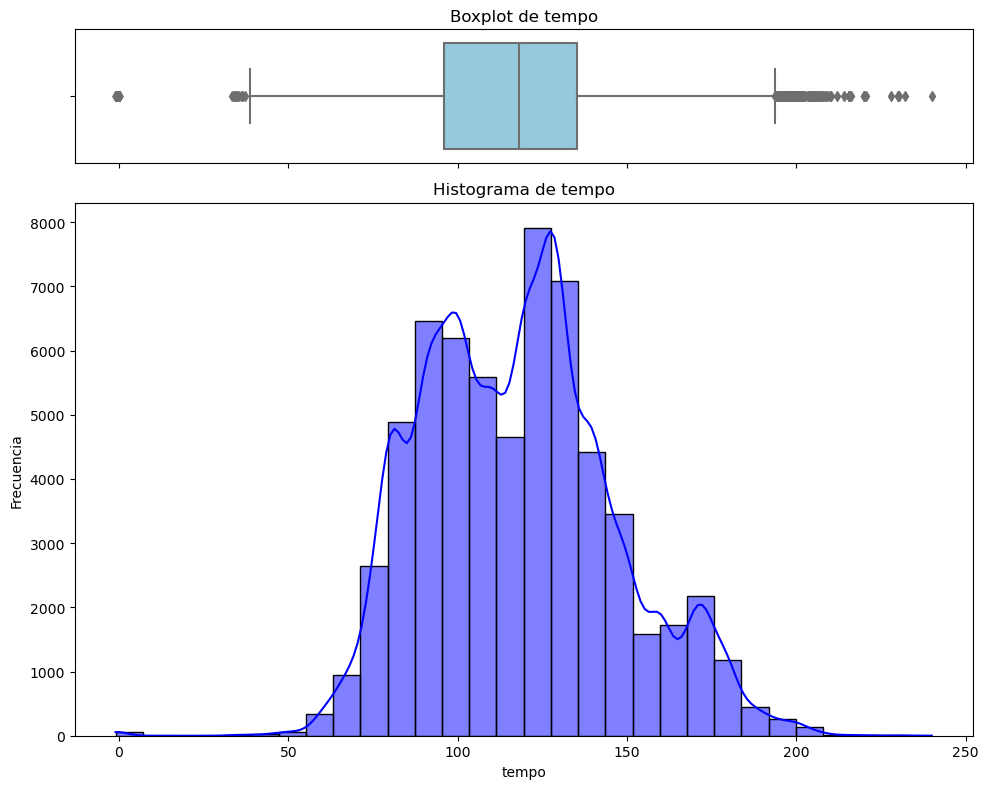

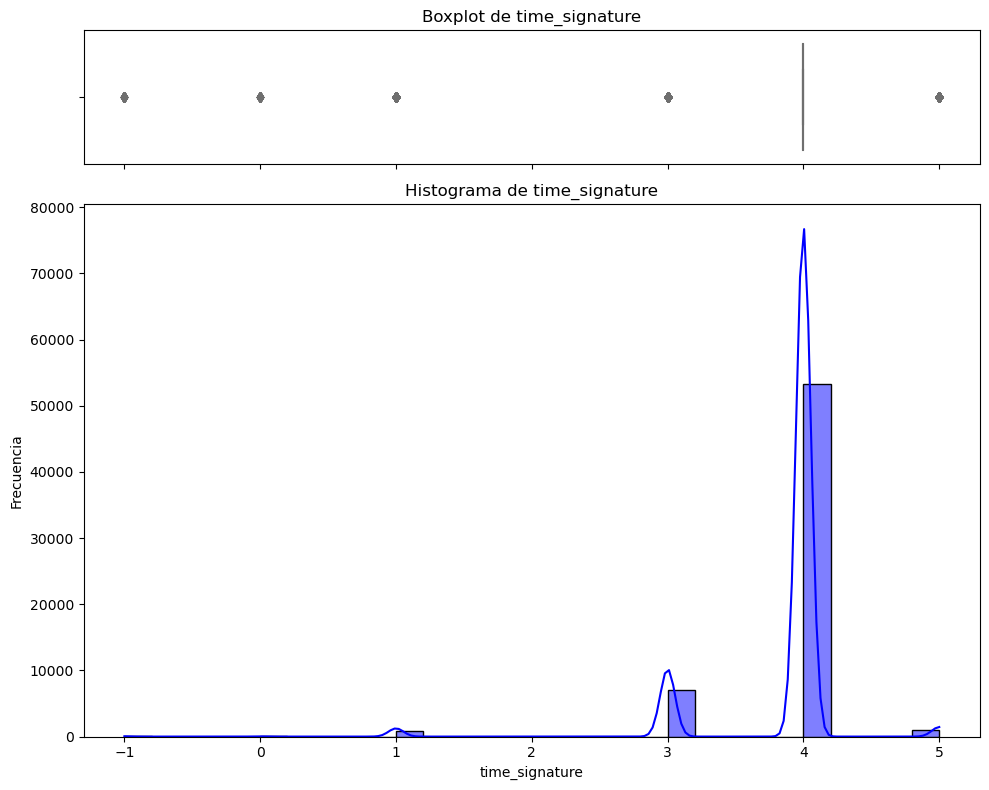

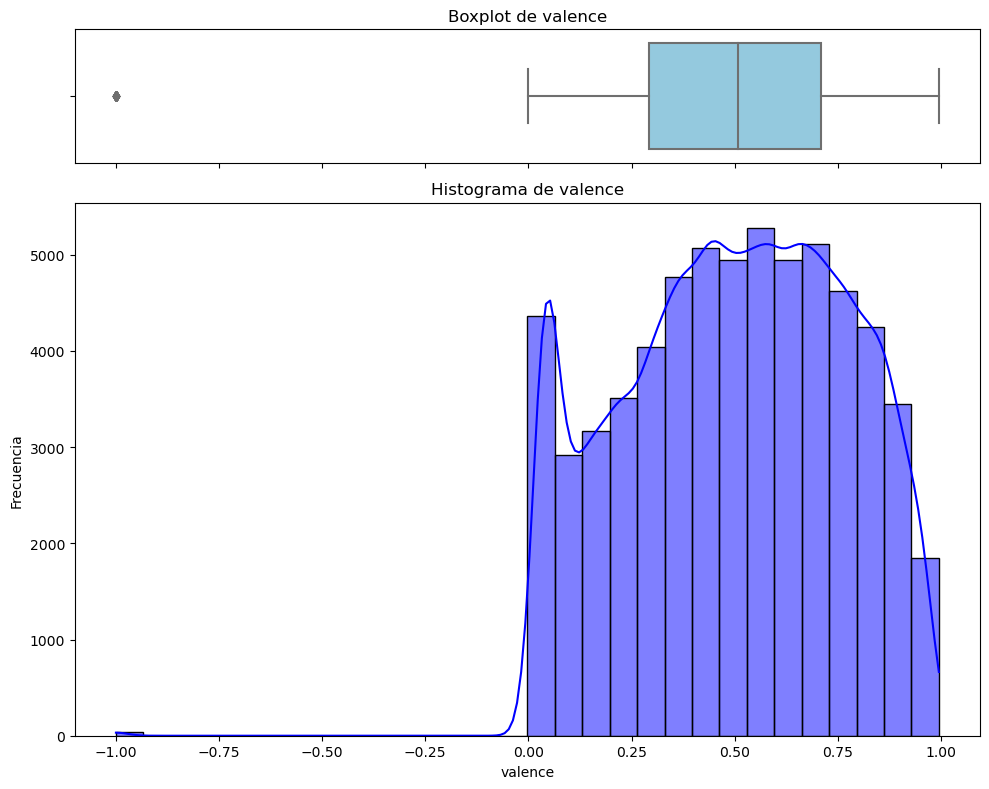

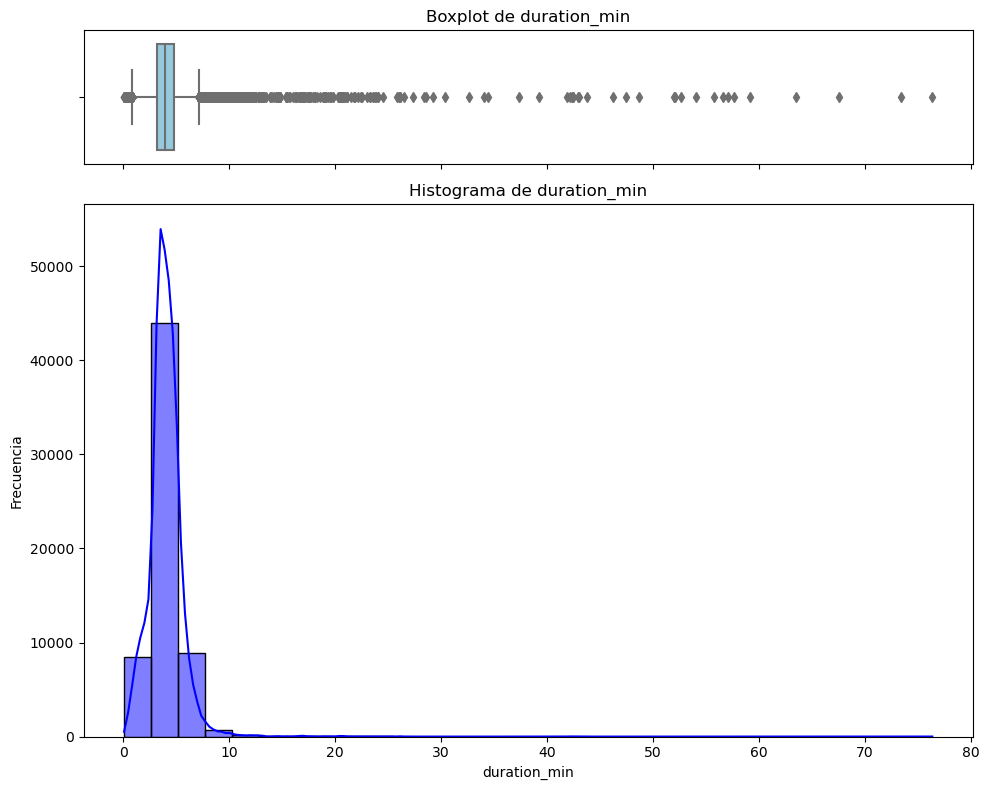

In [8]:
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear una gráfica combinada para cada variable numérica
for col in numeric_columns:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})
    
    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Boxplot de {col}")
    axes[0].set_xlabel("")
    axes[0].tick_params(axis='x', labelbottom=False)

    # Histograma
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1], color='blue')
    axes[1].set_title(f"Histograma de {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frecuencia")

    # Ajustar el espacio entre subgráficos
    plt.tight_layout()
    plt.show()

Vemos que las observaciones de antes de 2010 son relativamente pocas. Por tanto, por el motivo de poder proporcionar un análisis más riguroso, nos quedamos solamente con las observaciones de después del 2010.

Por otra parte, Energy vemos que existe un valor negativo, borramos esa observación y nos quemos con solo aquellas que sean mayor que 0

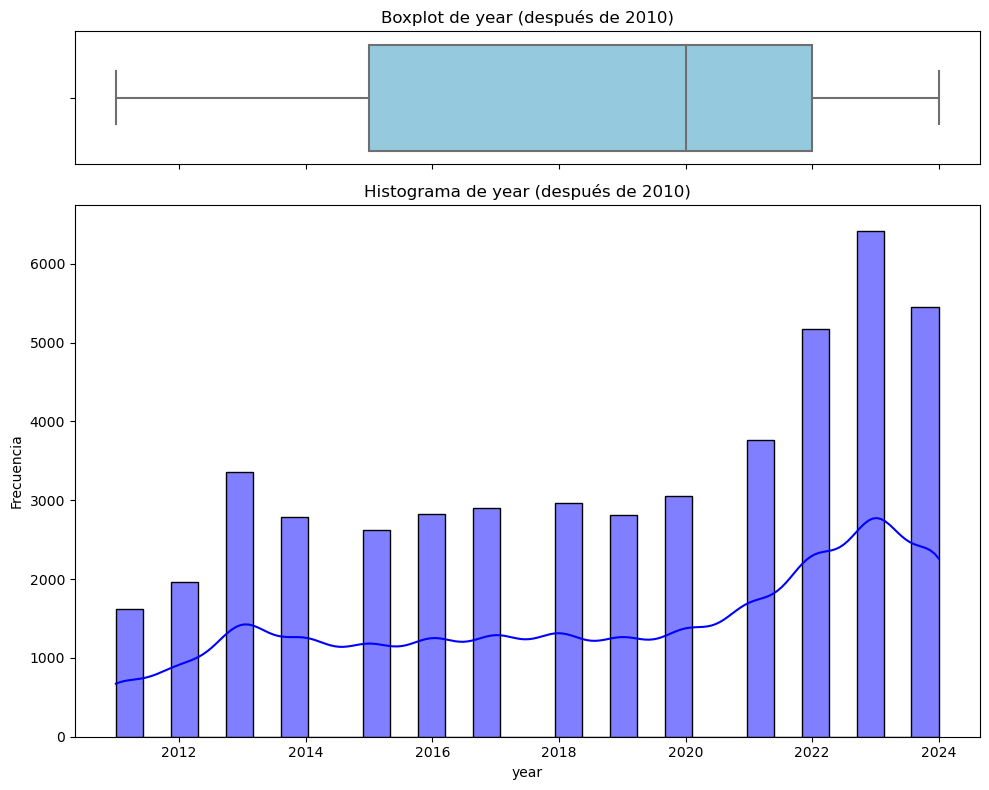

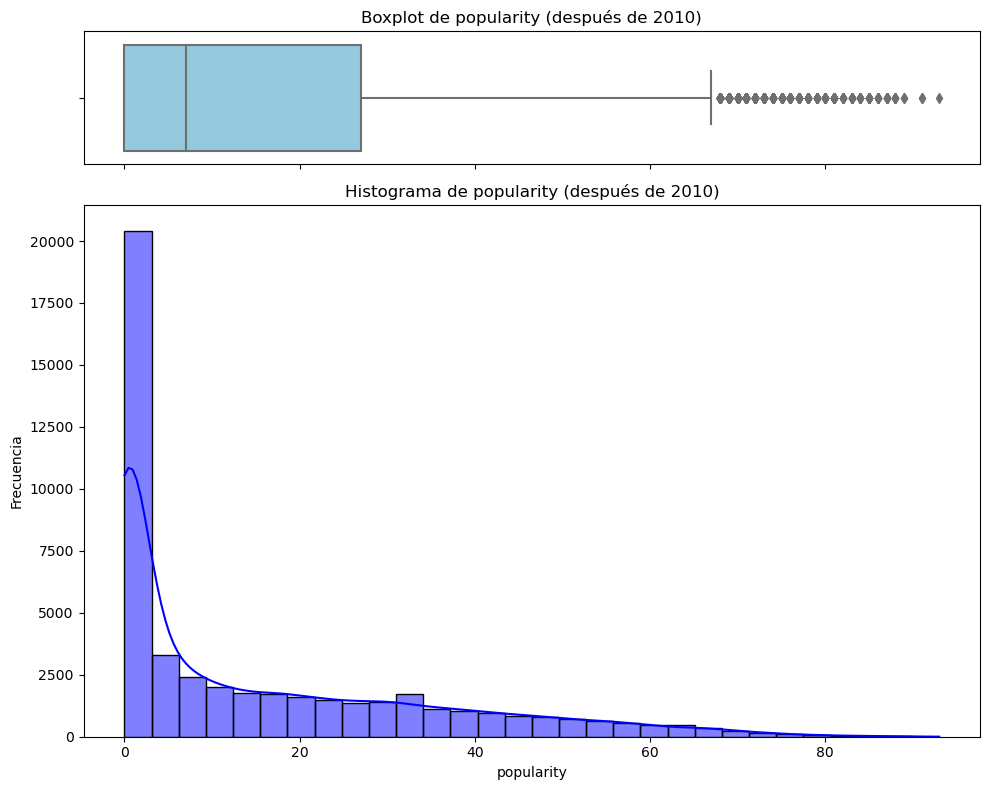

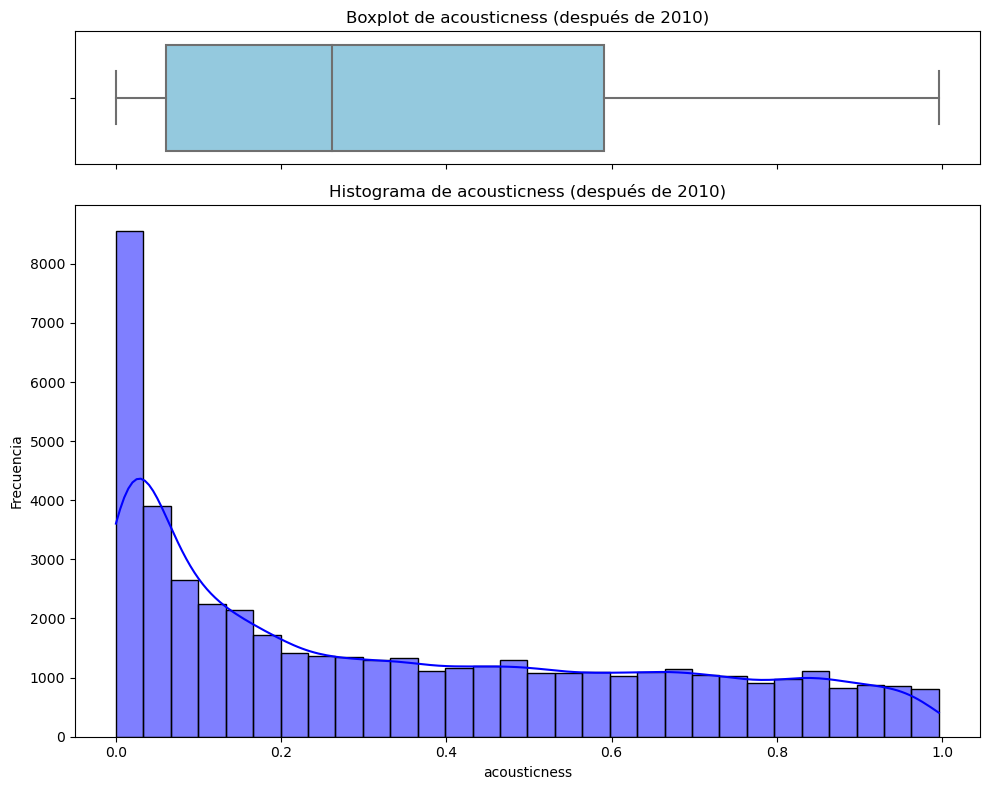

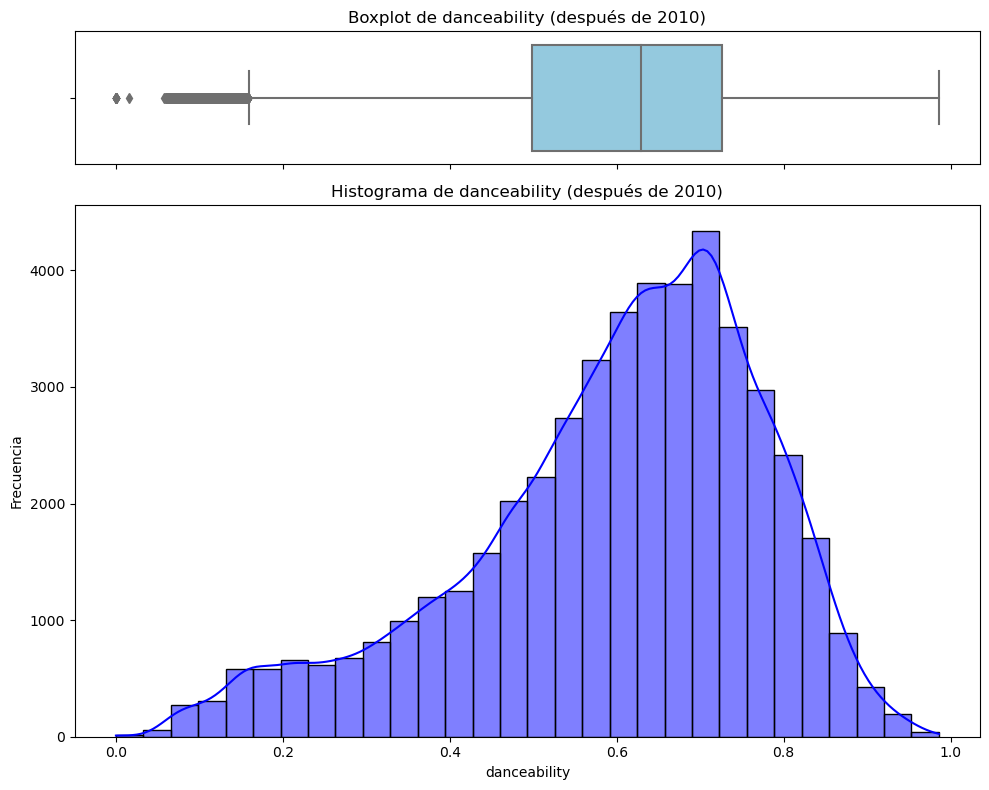

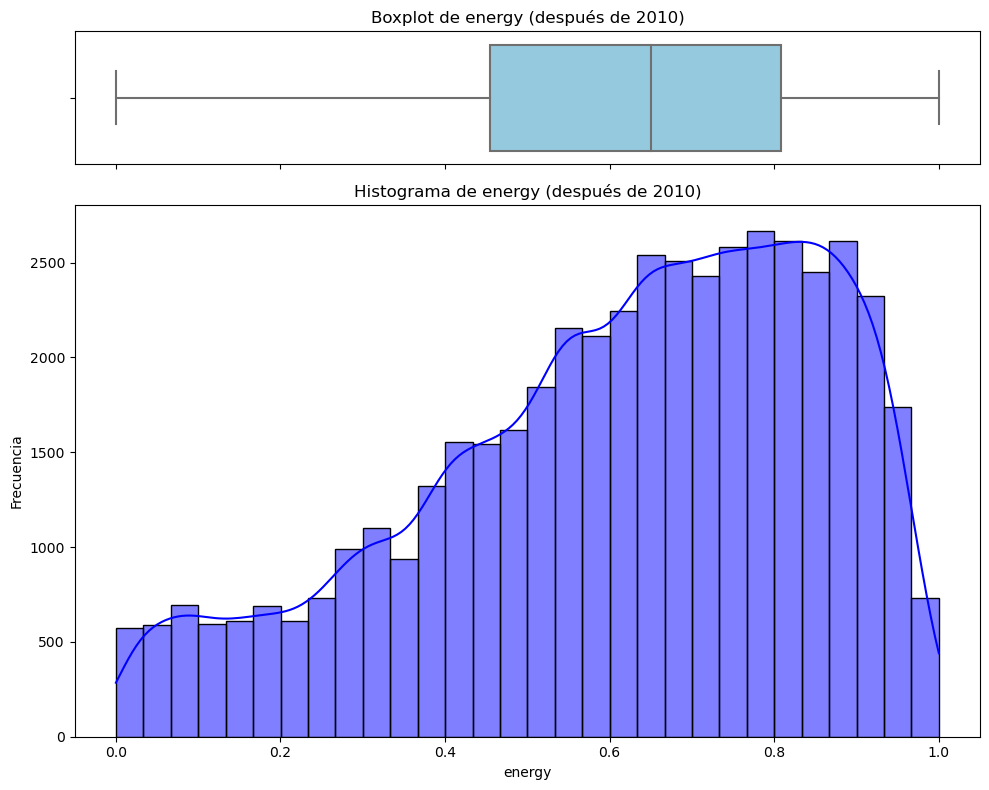

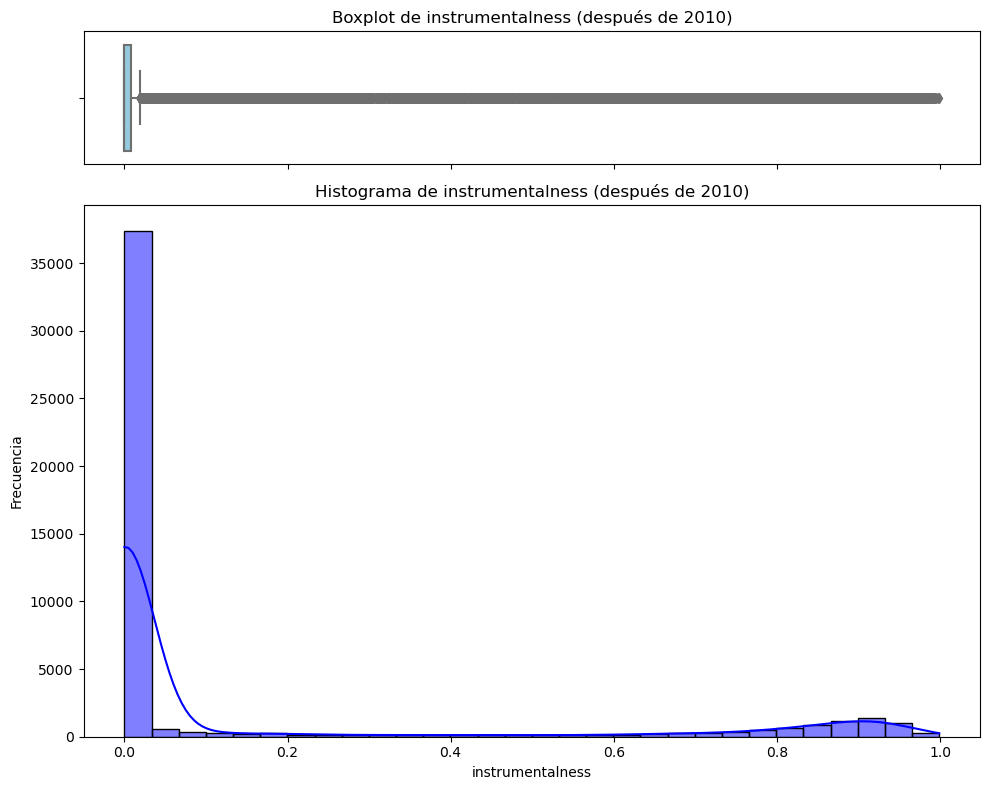

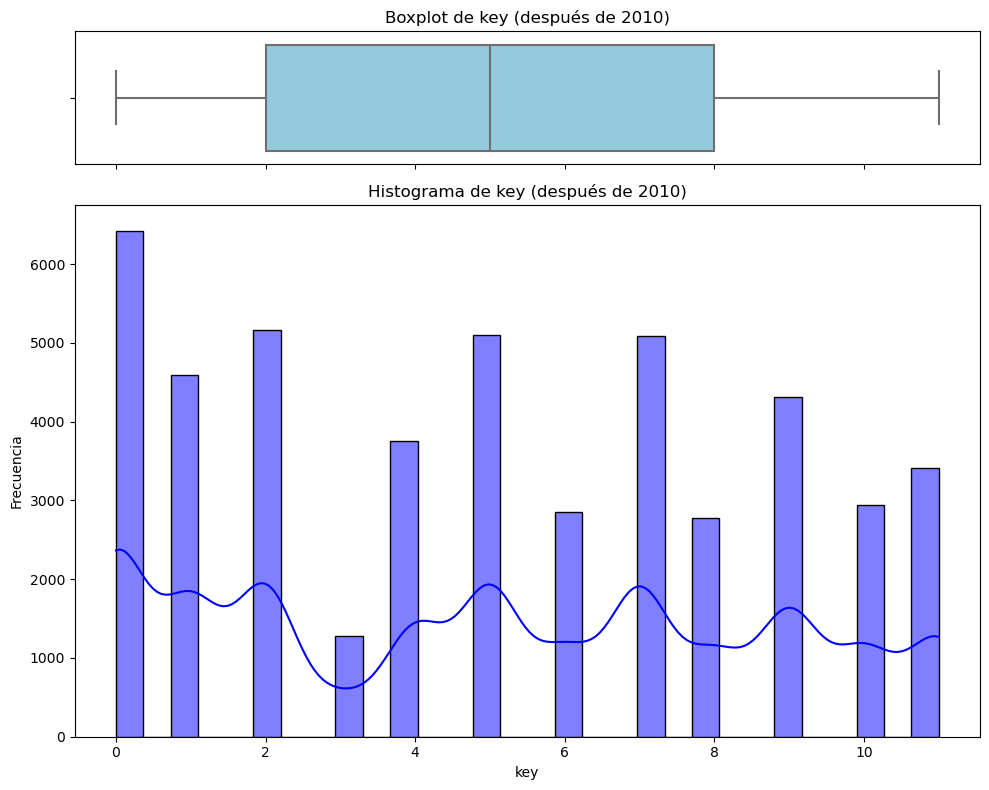

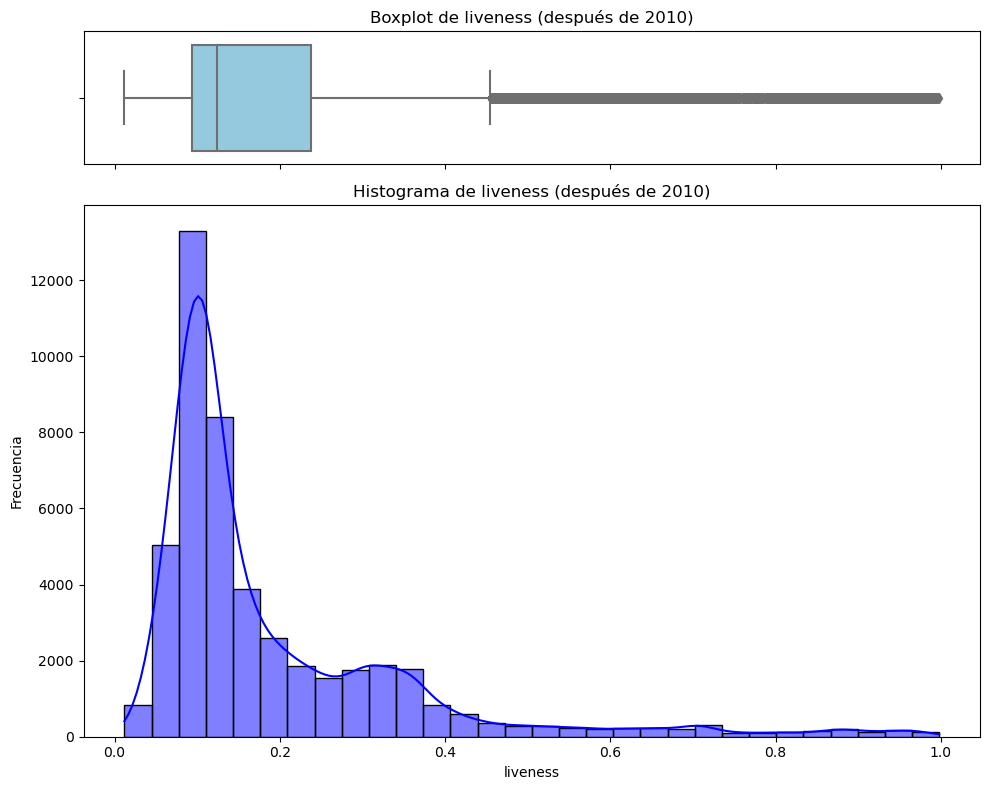

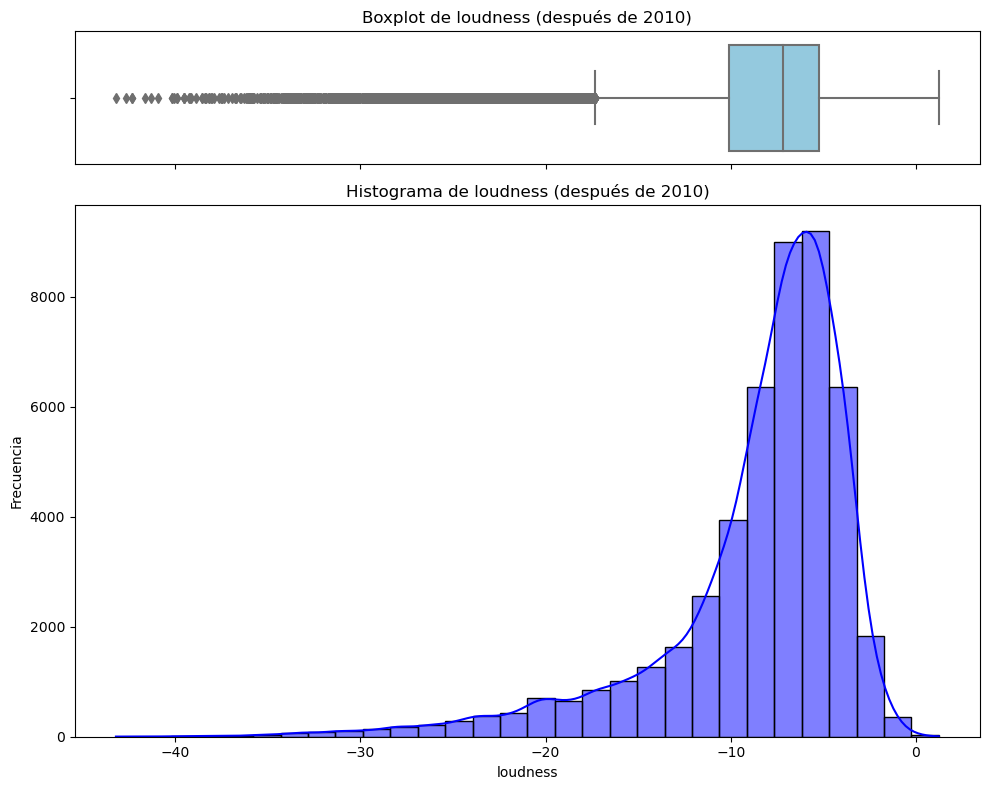

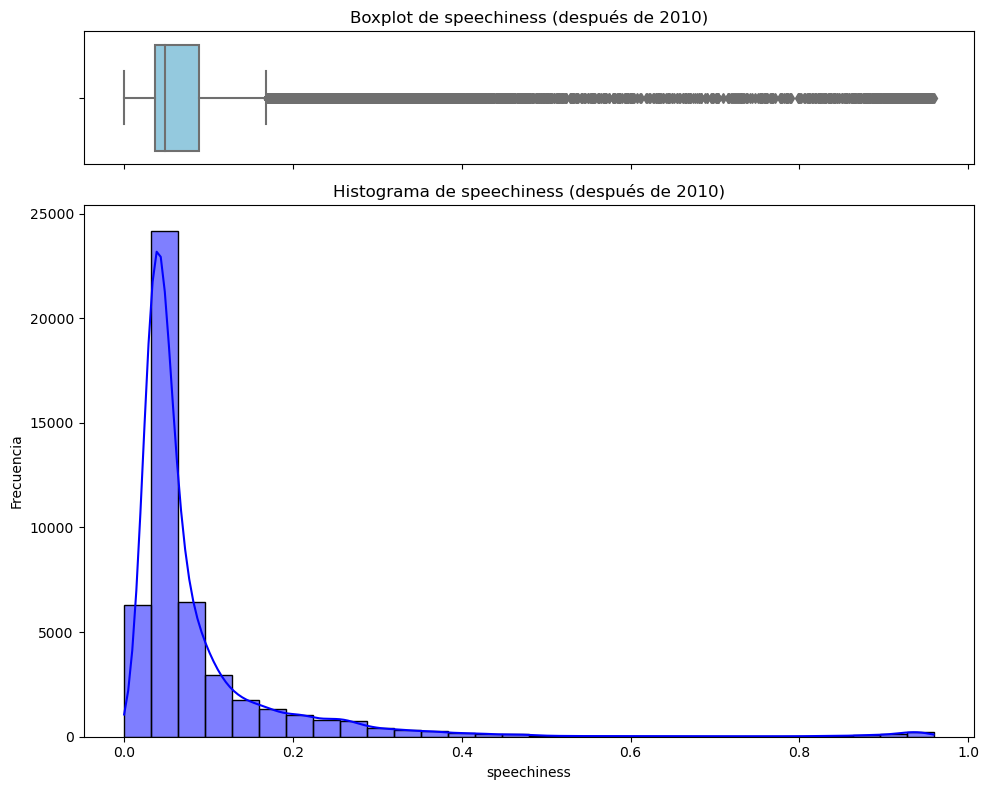

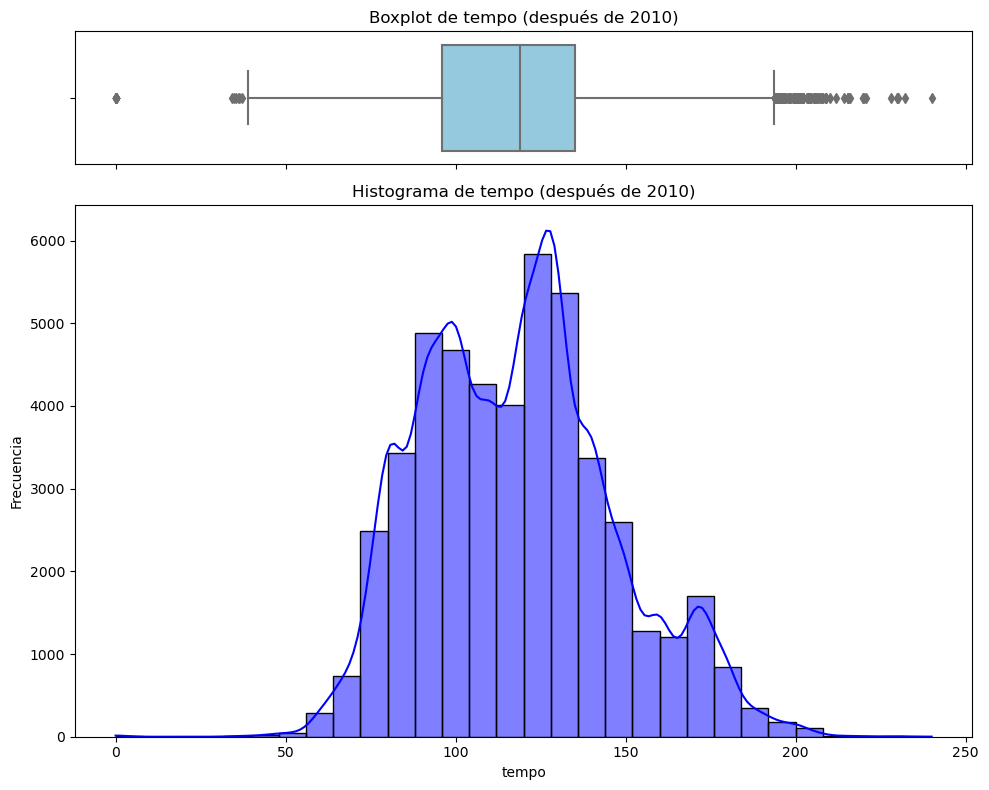

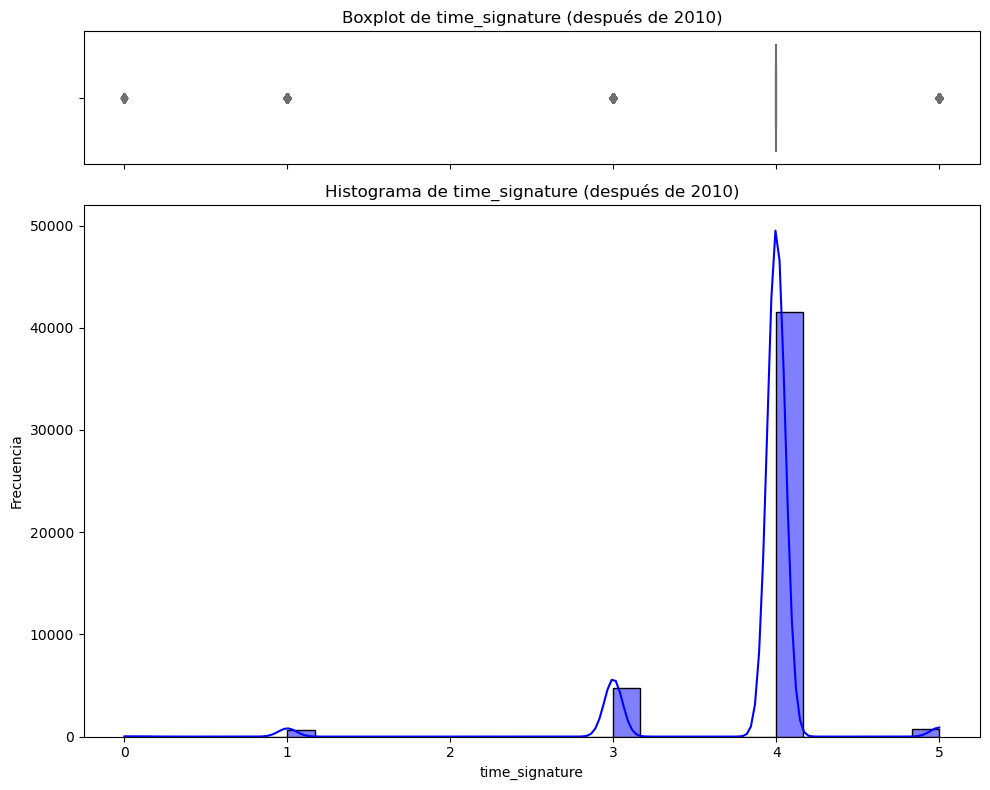

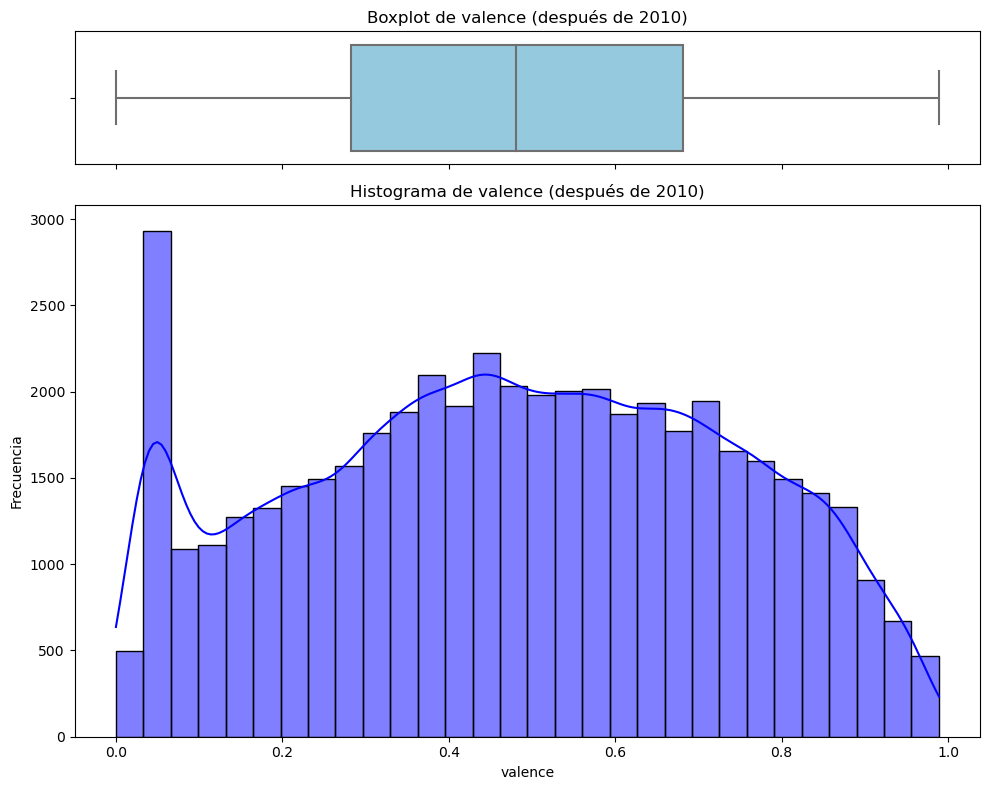

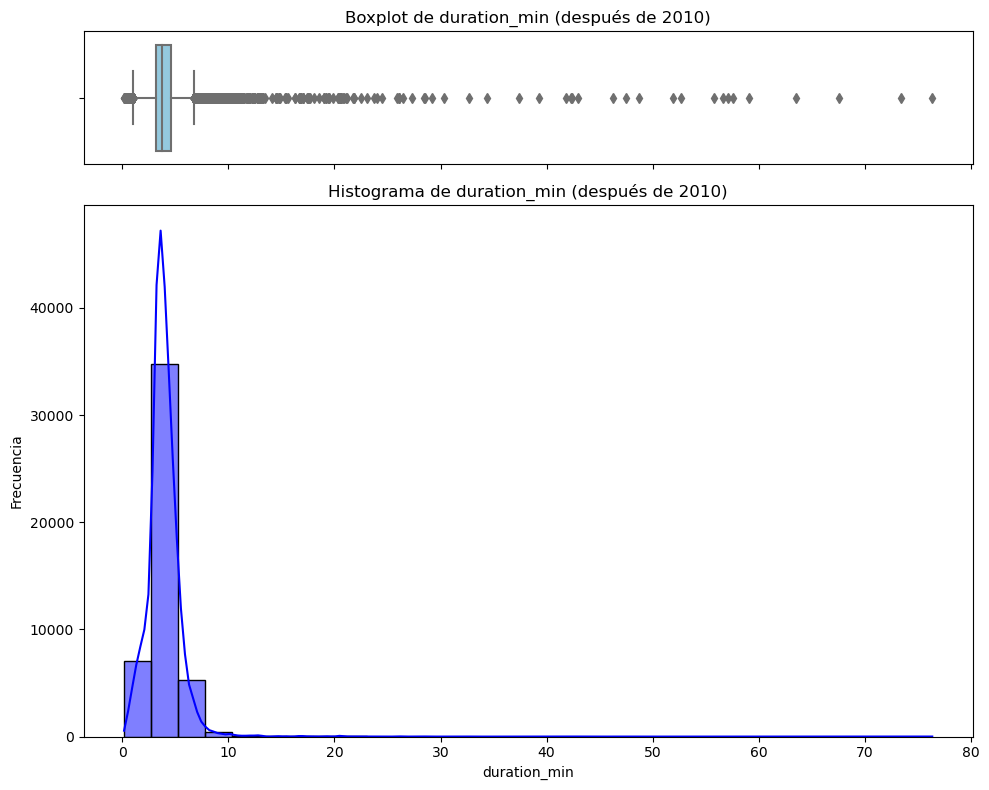

In [9]:
# Filtrar registros posteriores a 2010
df_filtered = df[(df['year'] > 2010) & (df['energy'] > 0)]

# Seleccionar columnas numéricas
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Crear una gráfica combinada para cada variable numérica
for col in numeric_columns:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})
    
    # Boxplot
    sns.boxplot(data=df_filtered, x=col, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Boxplot de {col} (después de 2010)")
    axes[0].set_xlabel("")
    axes[0].tick_params(axis='x', labelbottom=False)

    # Histograma
    sns.histplot(df_filtered[col], bins=30, kde=True, ax=axes[1], color='blue')
    axes[1].set_title(f"Histograma de {col} (después de 2010)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frecuencia")

    # Ajustar el espacio entre subgráficos
    plt.tight_layout()
    plt.show()

Ahora examinamos la distribución de la variable language. 

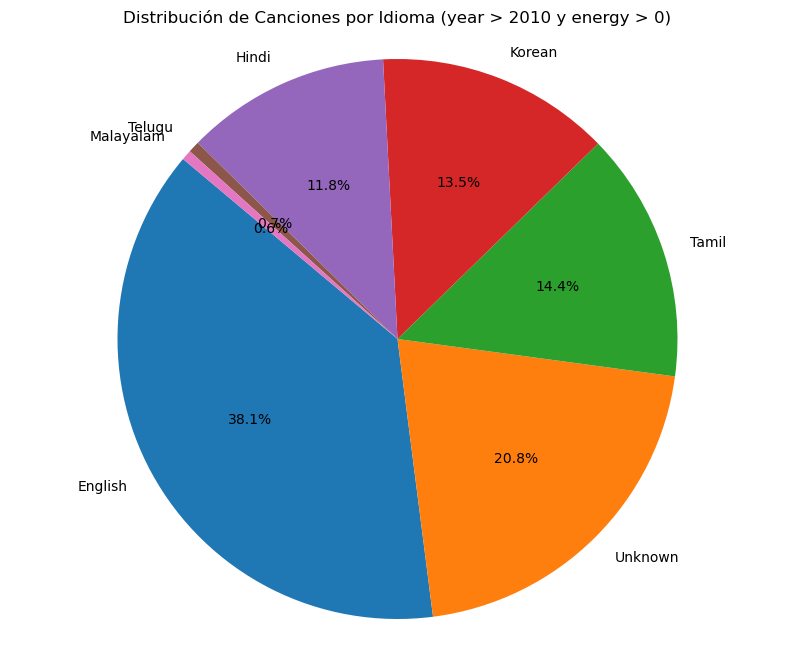

In [10]:
# Contar canciones por idioma
language_counts = df_filtered['language'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(10, 8))
plt.pie(
    language_counts.values,
    labels=language_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("Distribución de Canciones por Idioma (year > 2010 y energy > 0)")
plt.axis('equal')  # Asegurar que el pastel sea circular
plt.show()

Vemos que más de un tercio son canciones en inglés. El 20% unknown, 13,5 coreano y después tenemos a hindi y tamil. Para simplificar el problema y evitar sesgos, nos centramos en analizar las canciones en Inglés. Veamos cuantas observaciones nos quedan si filtramos solo por las canciones en inglés (con los filtros de antes ya aplicados.

In [11]:
print(df[(df['year'] > 2010) & (df['energy'] > 0) & (df['language'] == 'English')].shape[0])

18198


Con 18198 observaciones tenemos más que suficiente para poder analizar y visualizar la tendencia. 

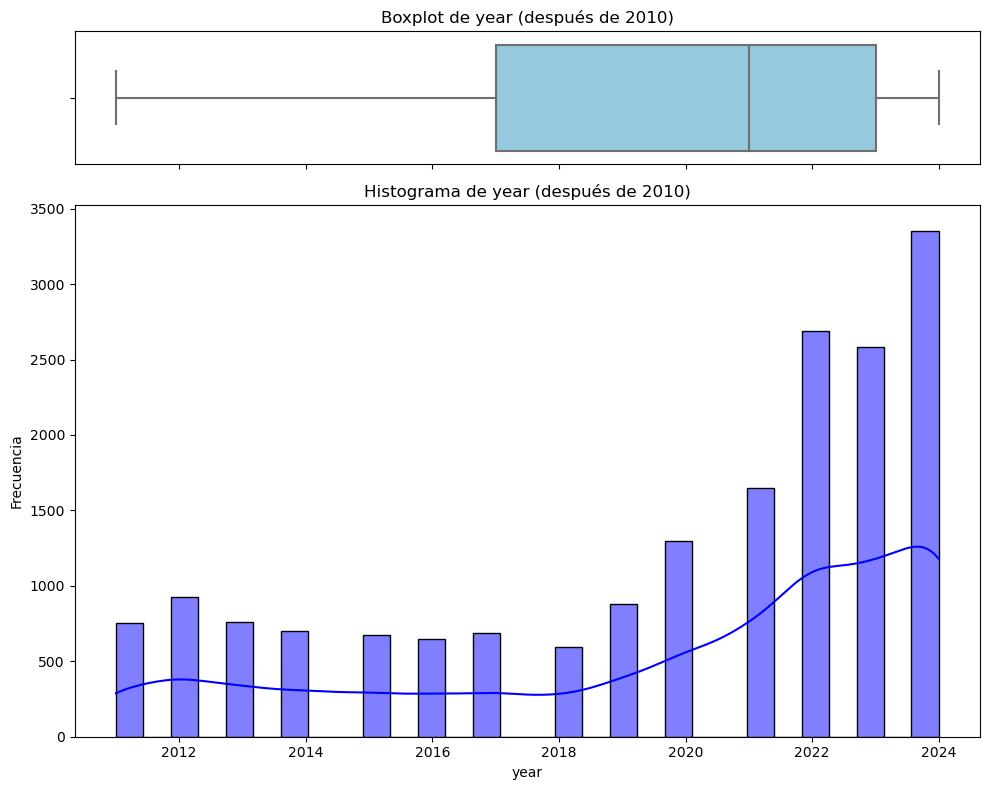

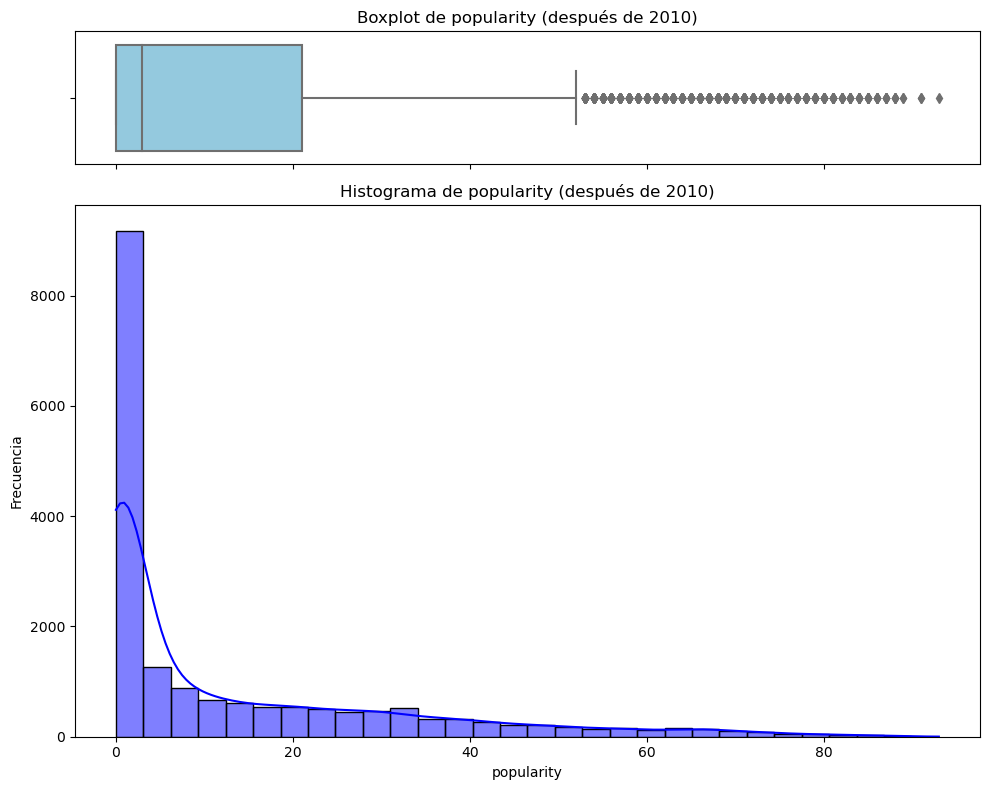

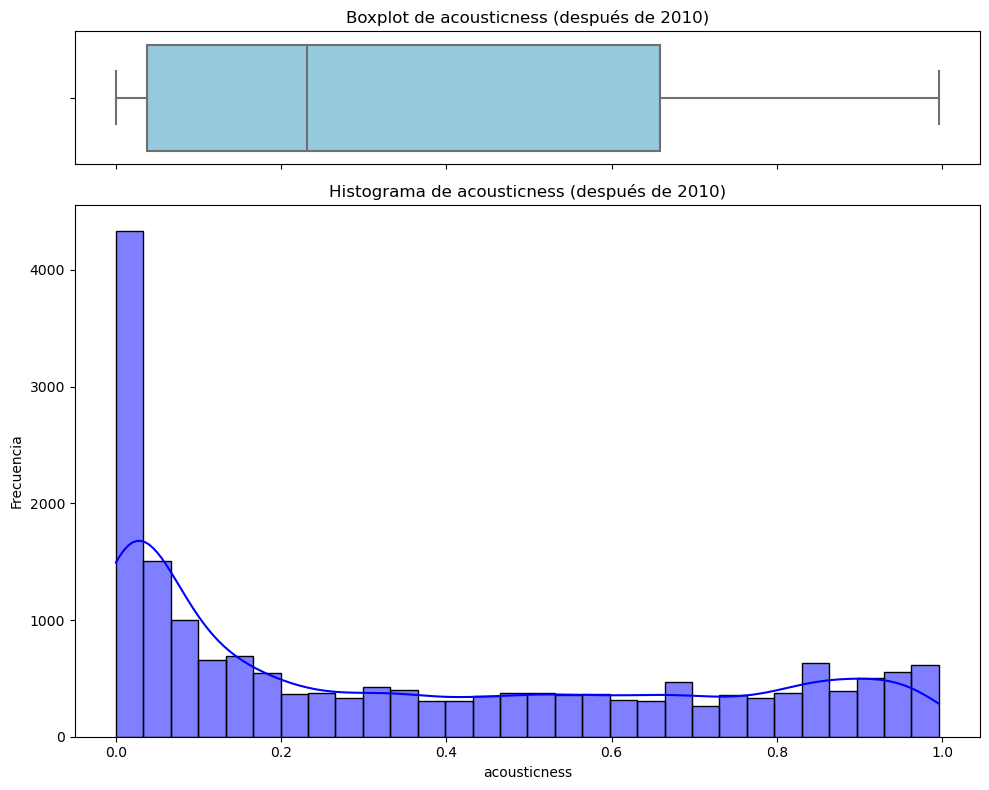

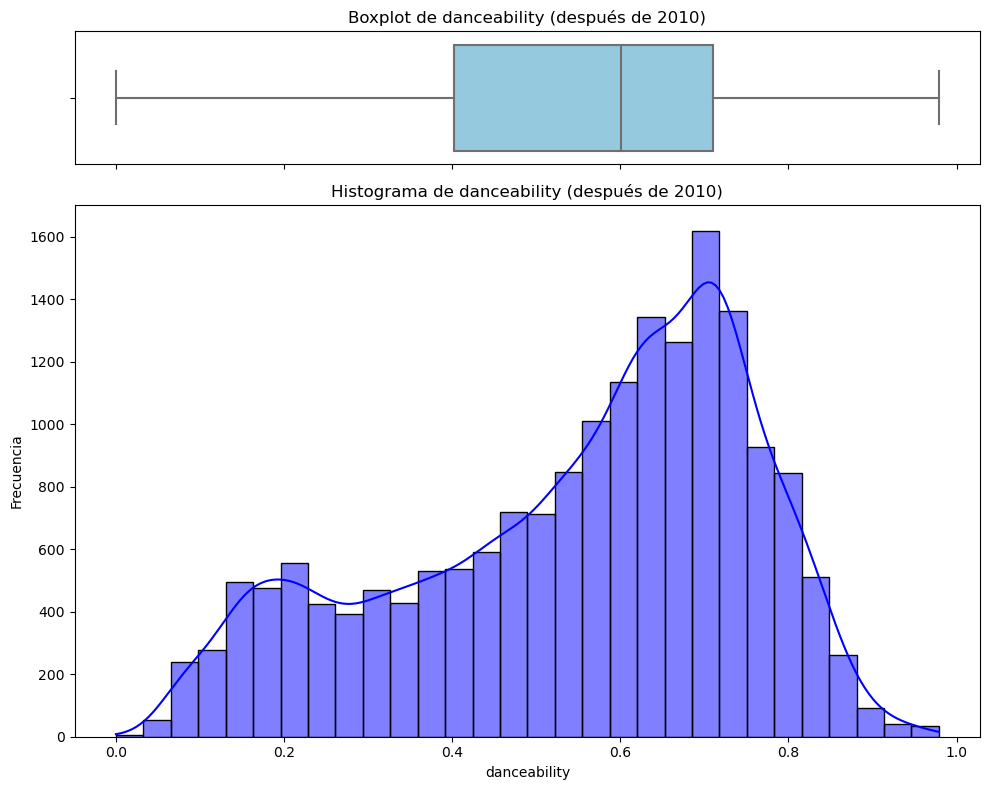

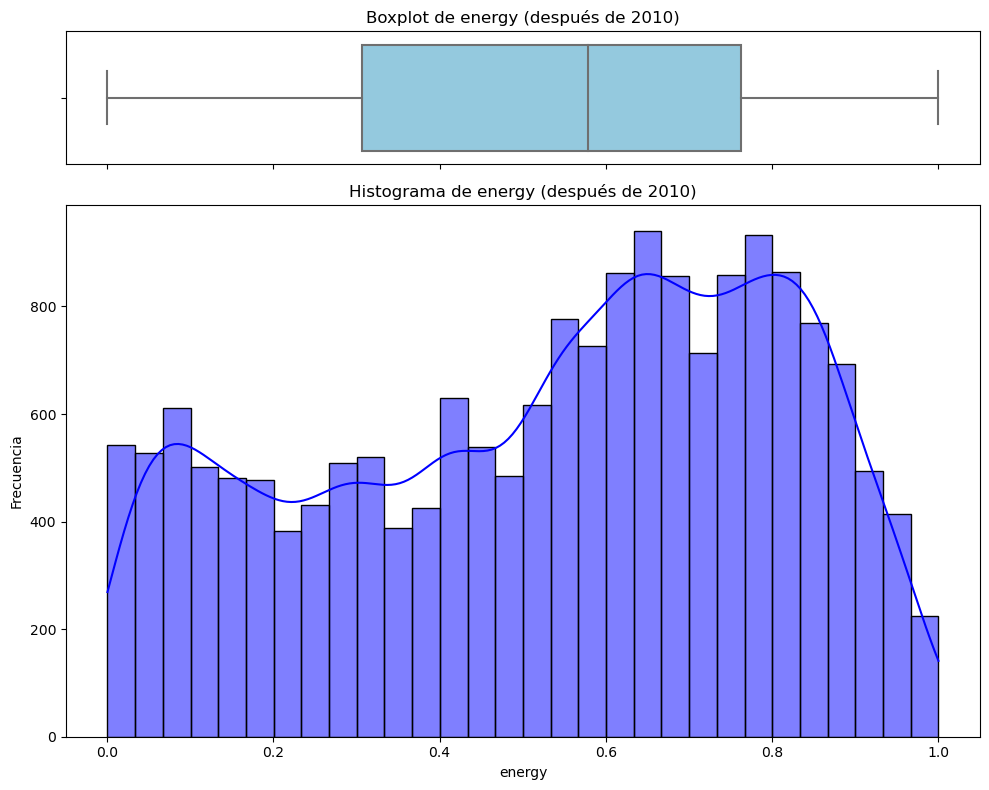

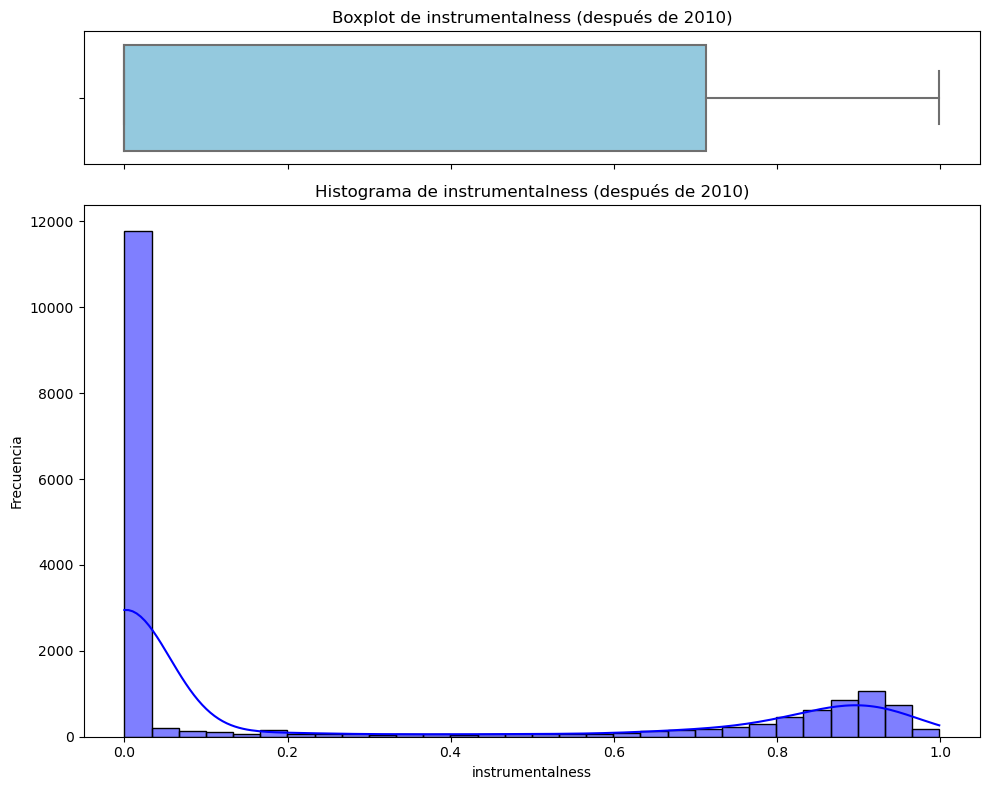

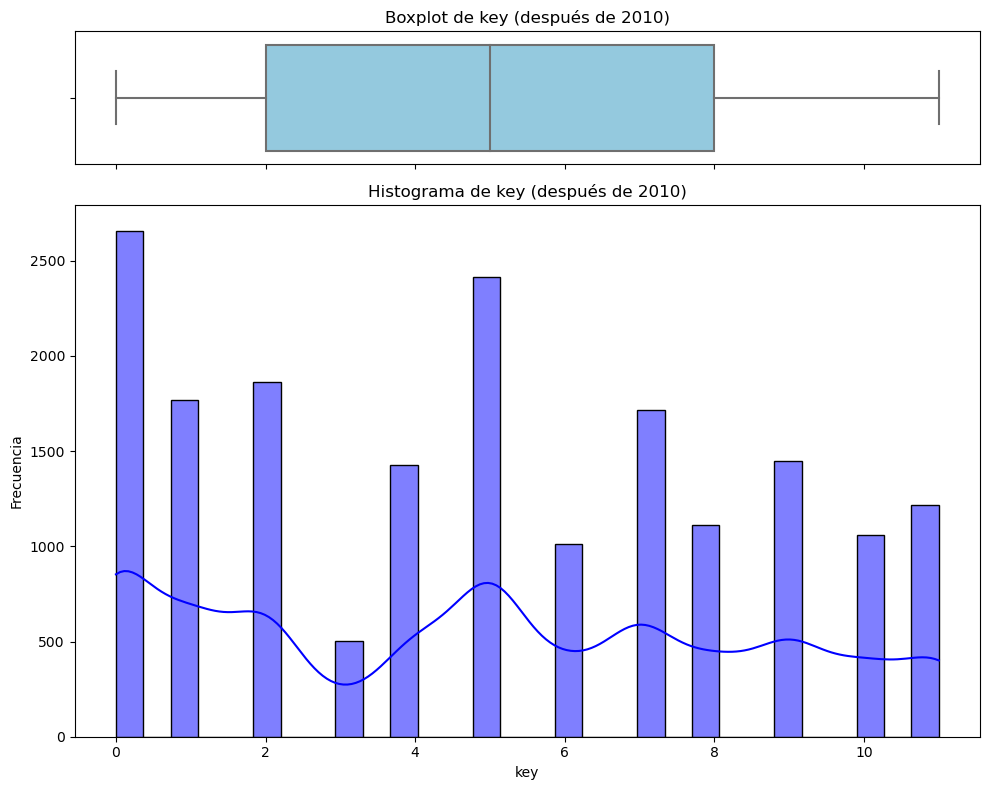

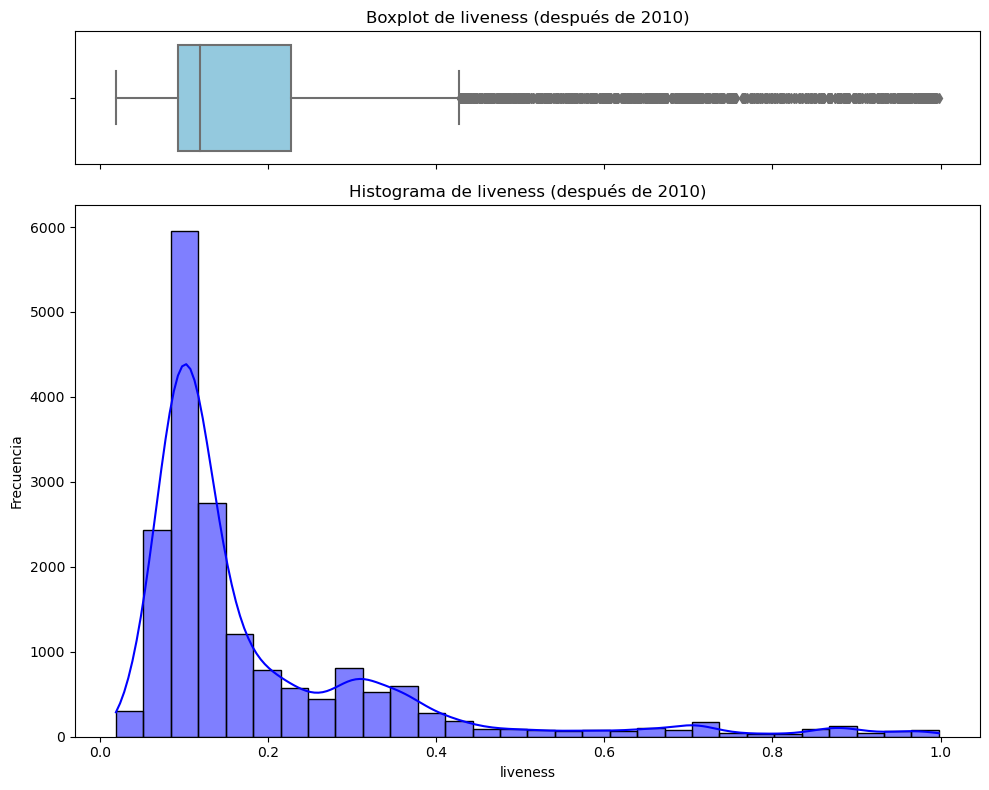

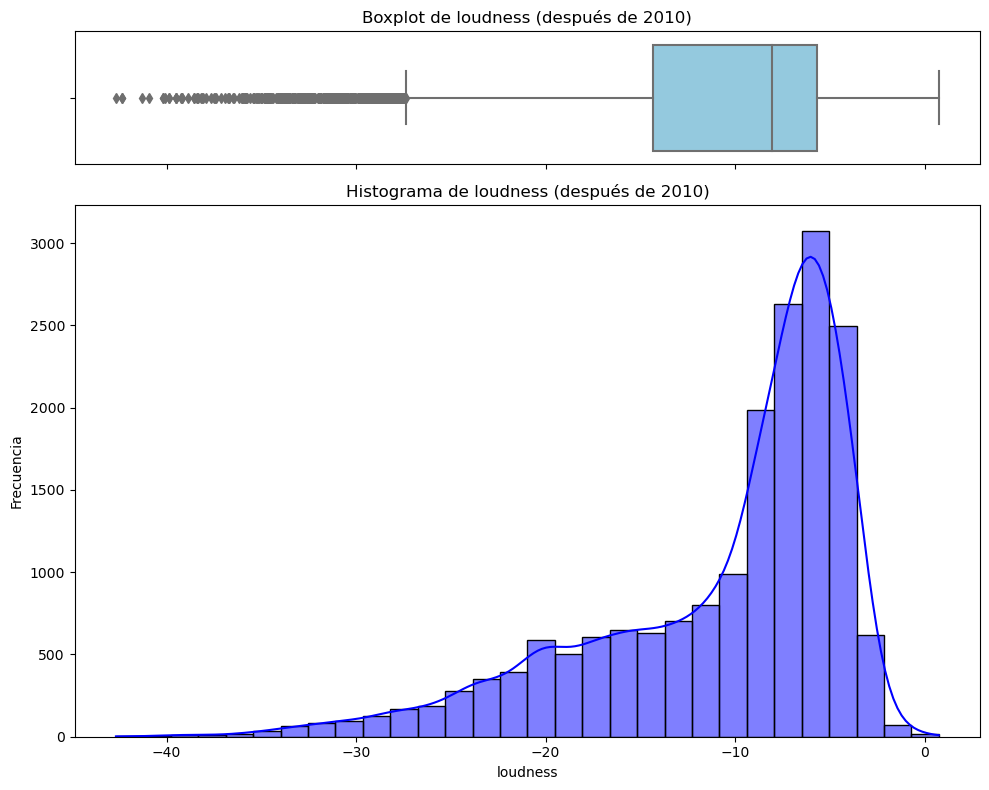

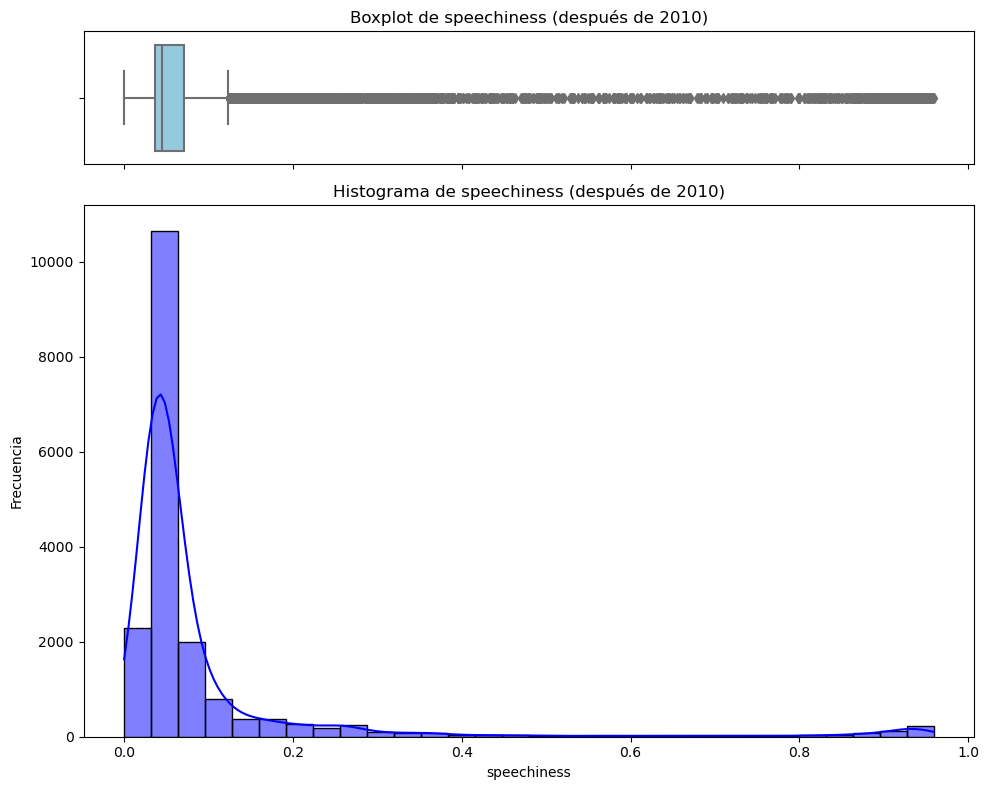

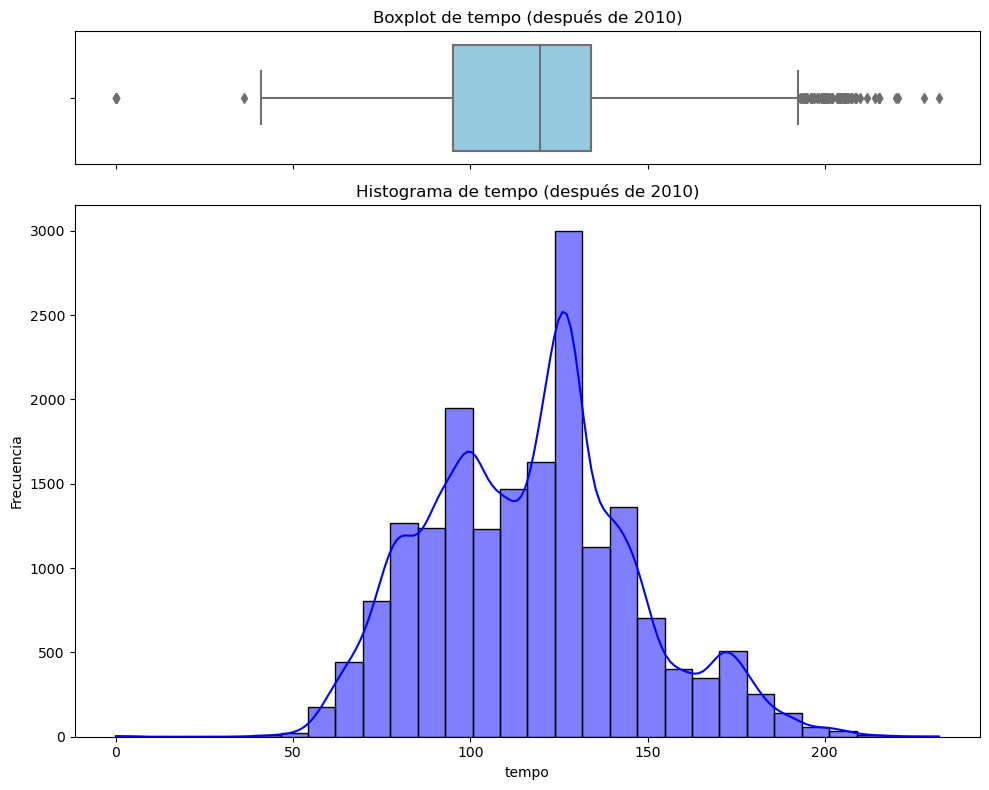

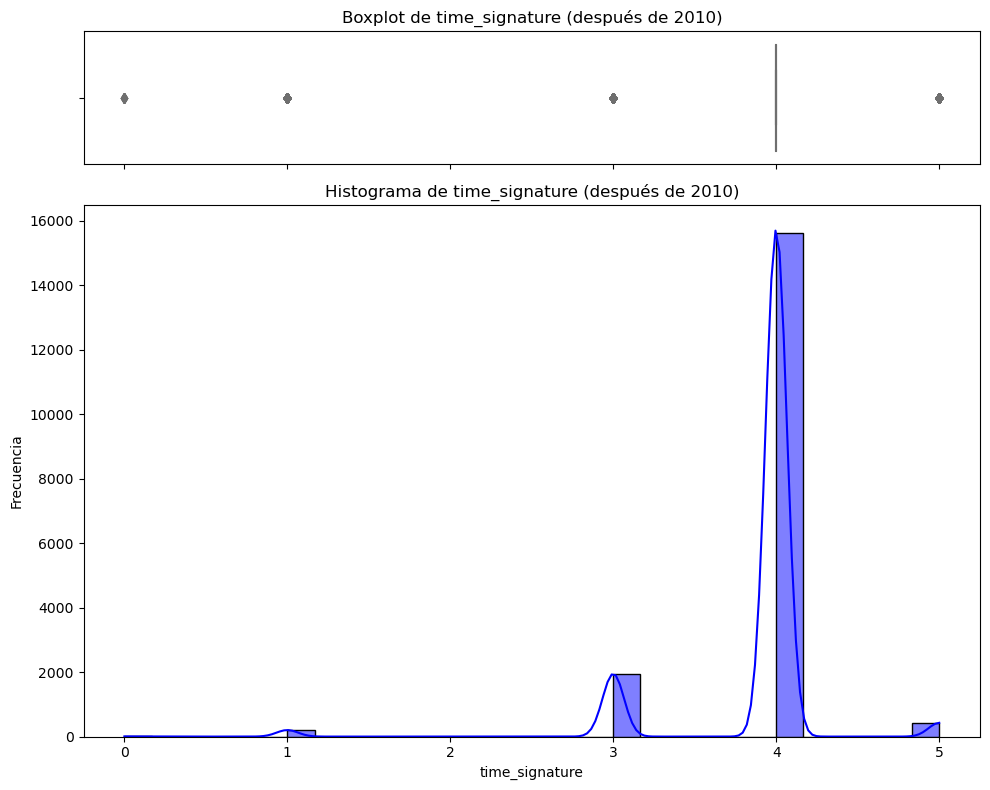

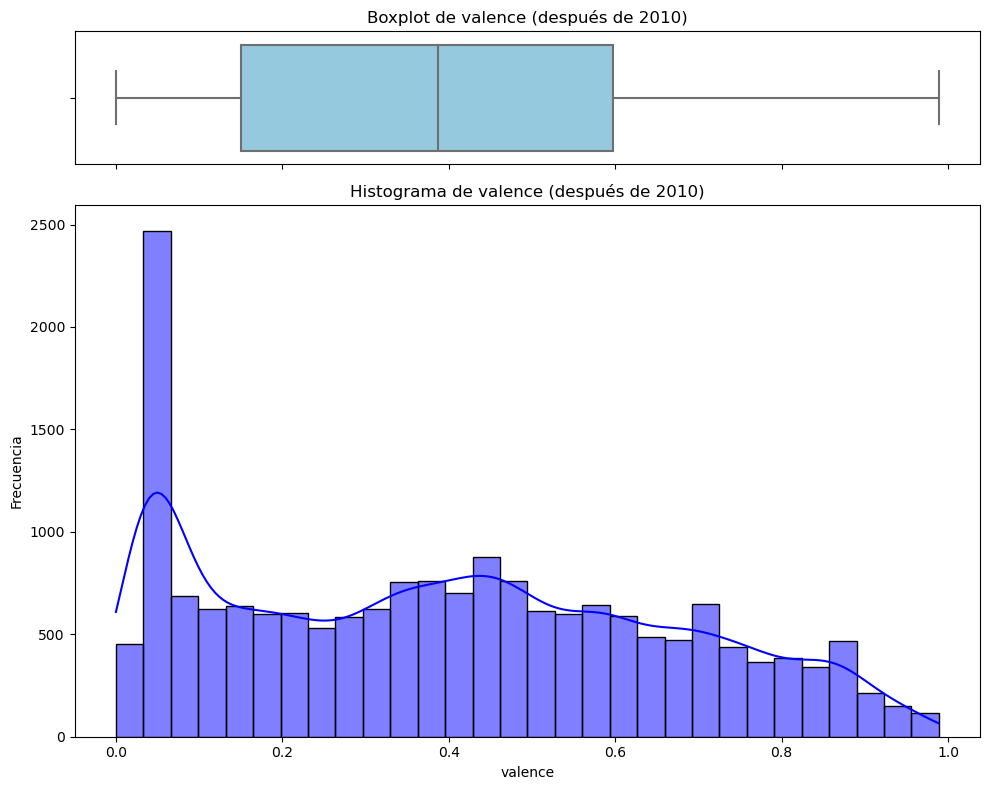

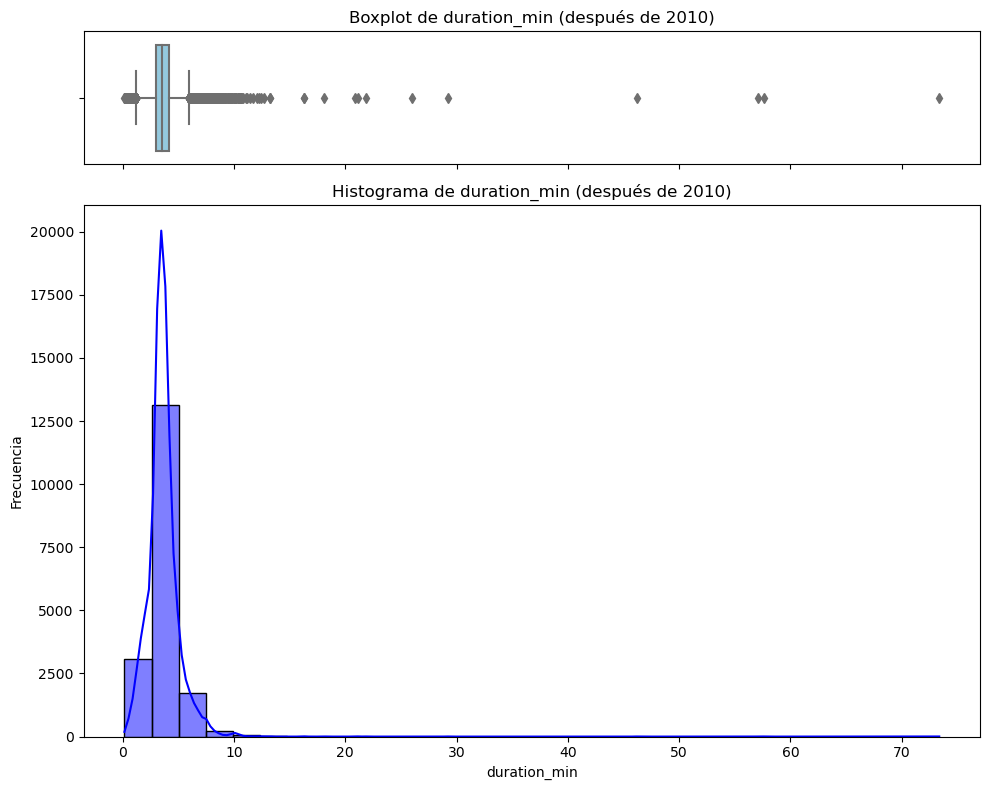

In [12]:
df_filtered = df[(df['year'] > 2010) & (df['energy'] > 0) & (df['language'] == 'English')]
for col in numeric_columns:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})
    
    # Boxplot
    sns.boxplot(data=df_filtered, x=col, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Boxplot de {col} (después de 2010)")
    axes[0].set_xlabel("")
    axes[0].tick_params(axis='x', labelbottom=False)

    # Histograma
    sns.histplot(df_filtered[col], bins=30, kde=True, ax=axes[1], color='blue')
    axes[1].set_title(f"Histograma de {col} (después de 2010)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frecuencia")

    # Ajustar el espacio entre subgráficos
    plt.tight_layout()
    plt.show()


Por otra parte, vemos que existen registros de más de 6 min de música. Asi que quitamos los valores extremos que la variable duration_min indicados en el boxplot

In [13]:
# Calcular los límites del IQR
Q1 = df_filtered['duration_min'].quantile(0.25)  # Primer cuartil
Q3 = df_filtered['duration_min'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para identificar valores extremos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos dentro del rango
df_filtered = df_filtered[(df_filtered['duration_min'] >= lower_limit) & (df_filtered['duration_min'] <= upper_limit)]

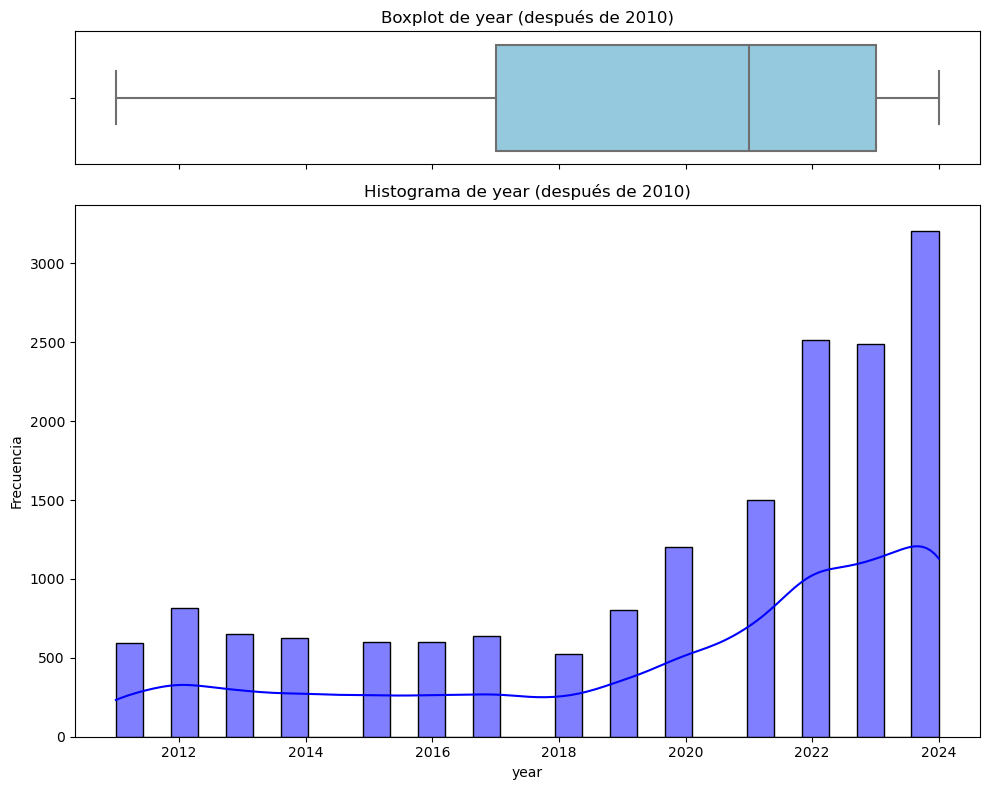

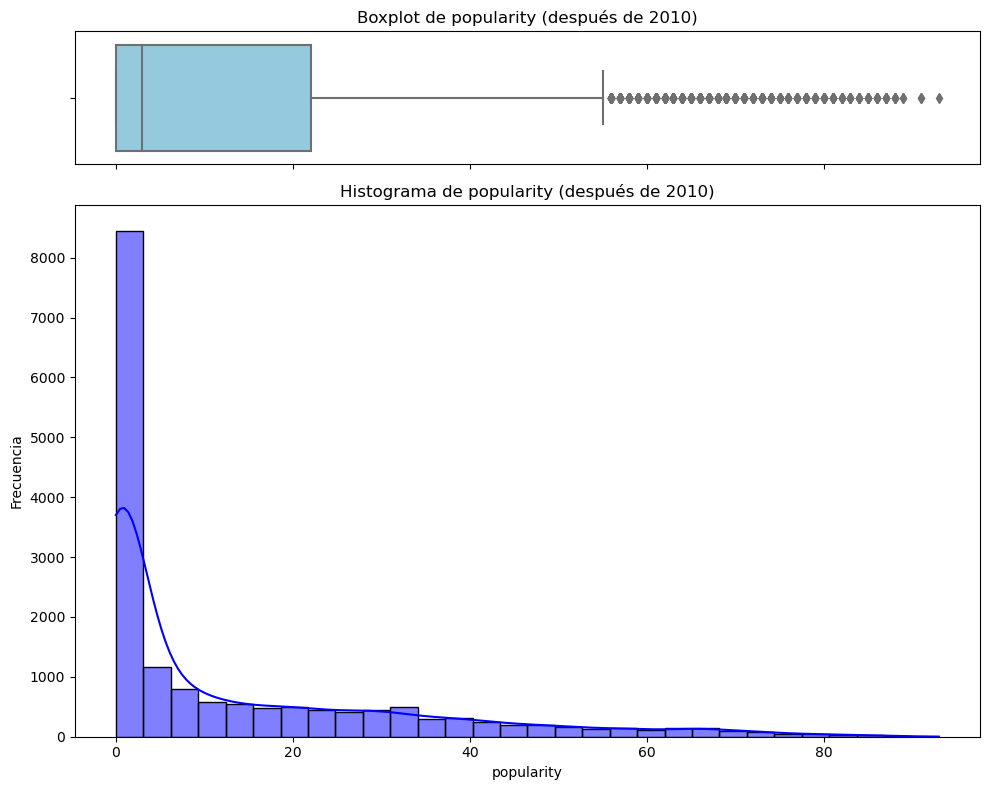

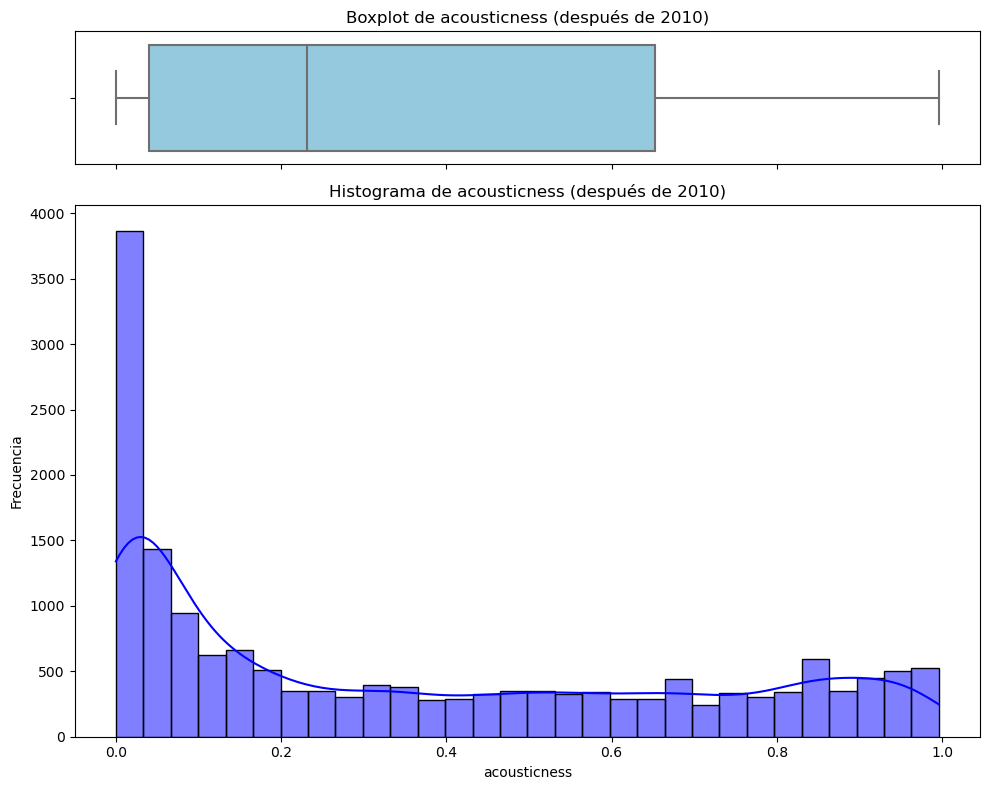

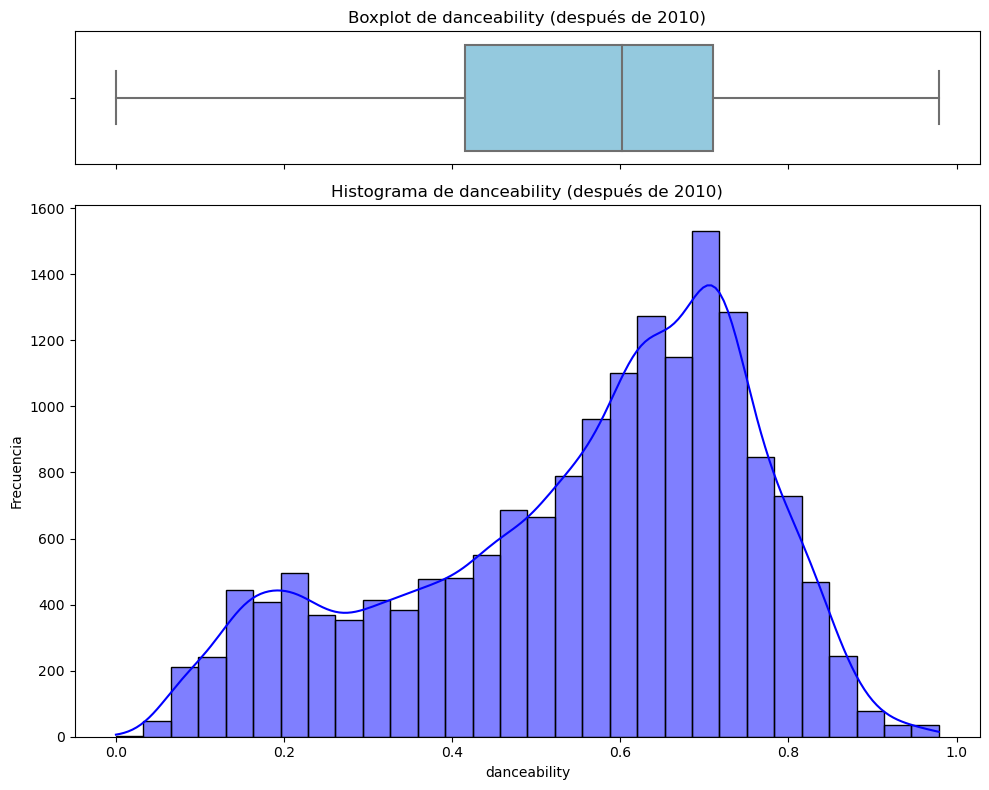

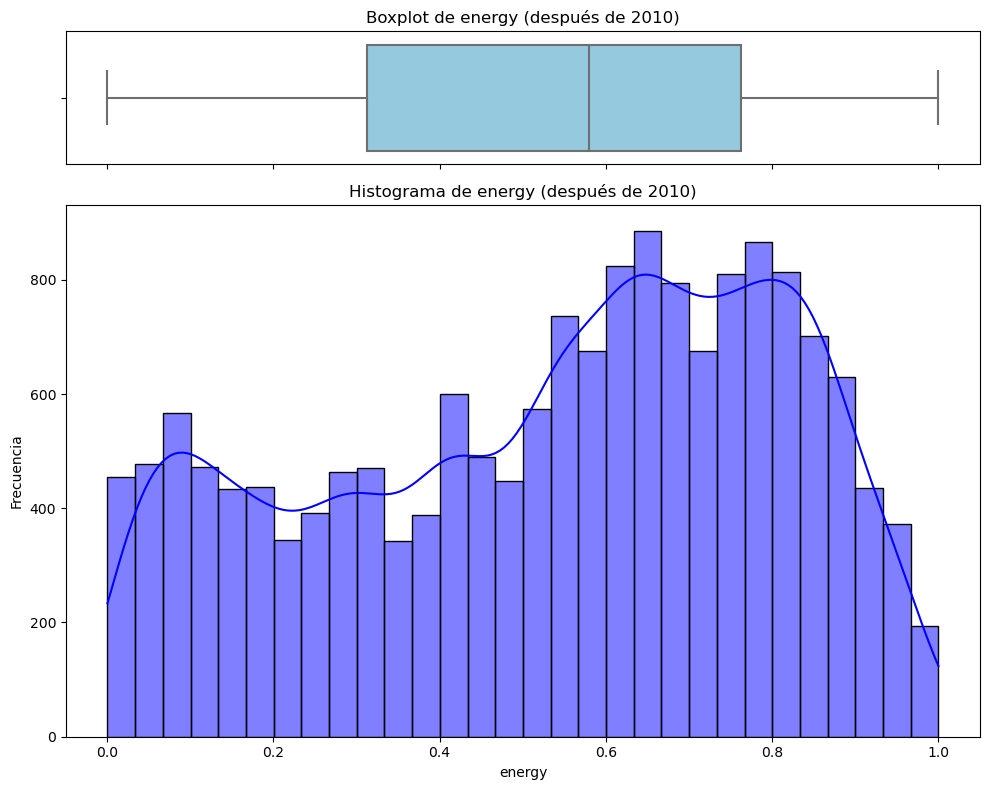

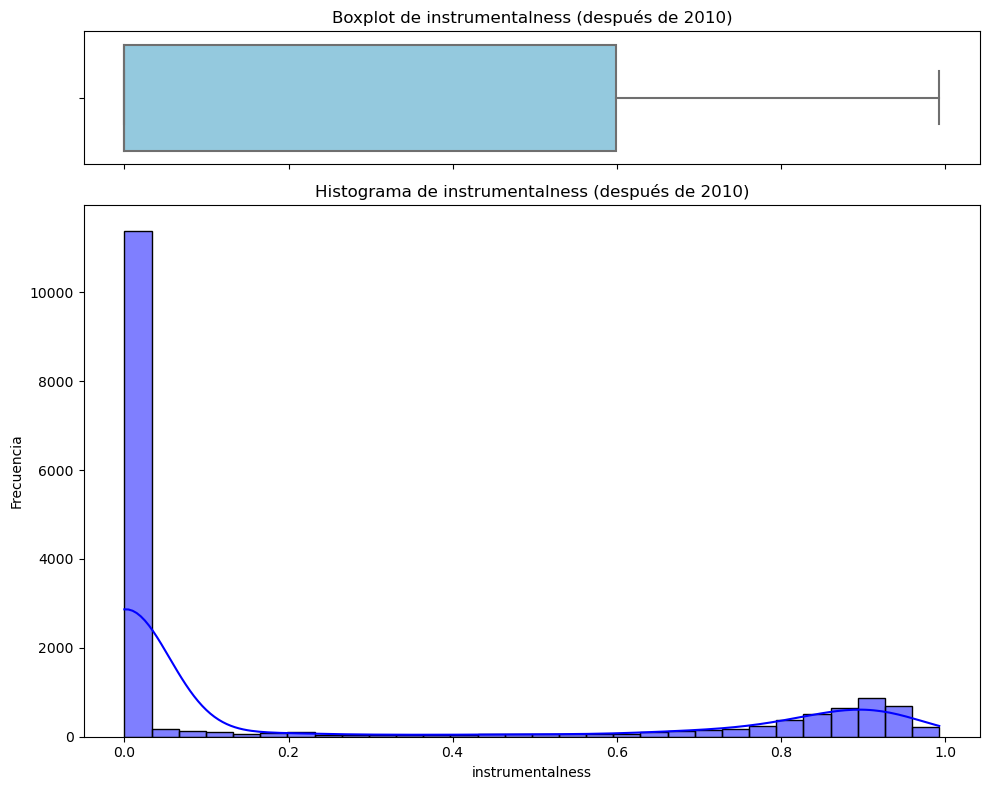

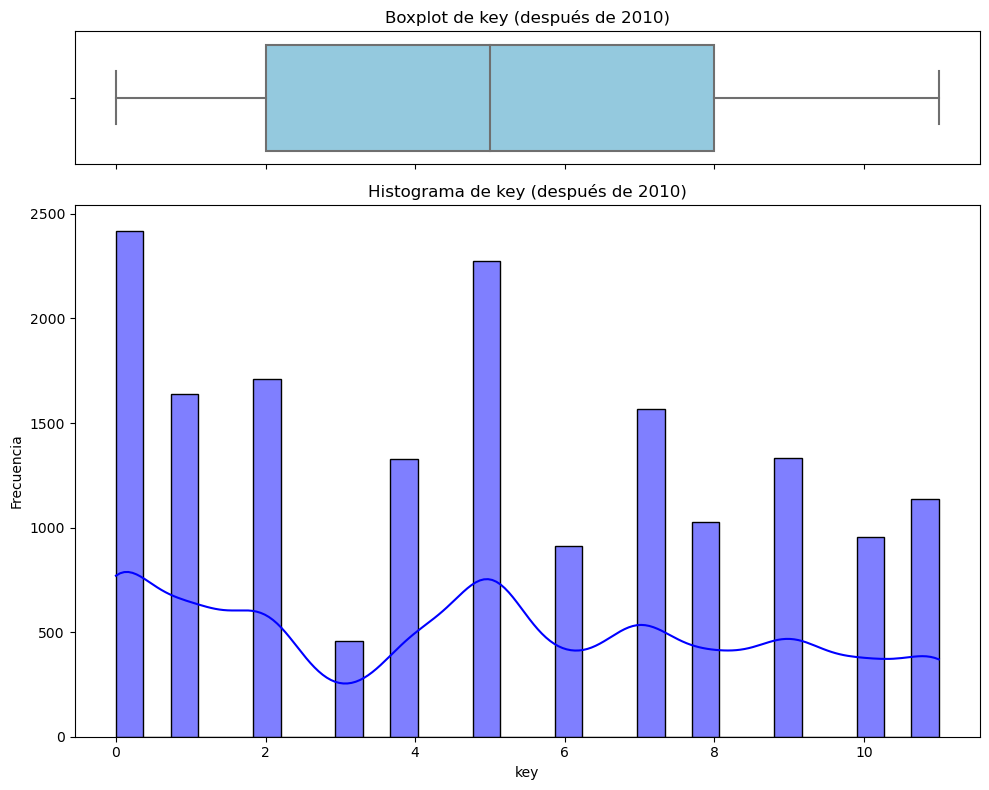

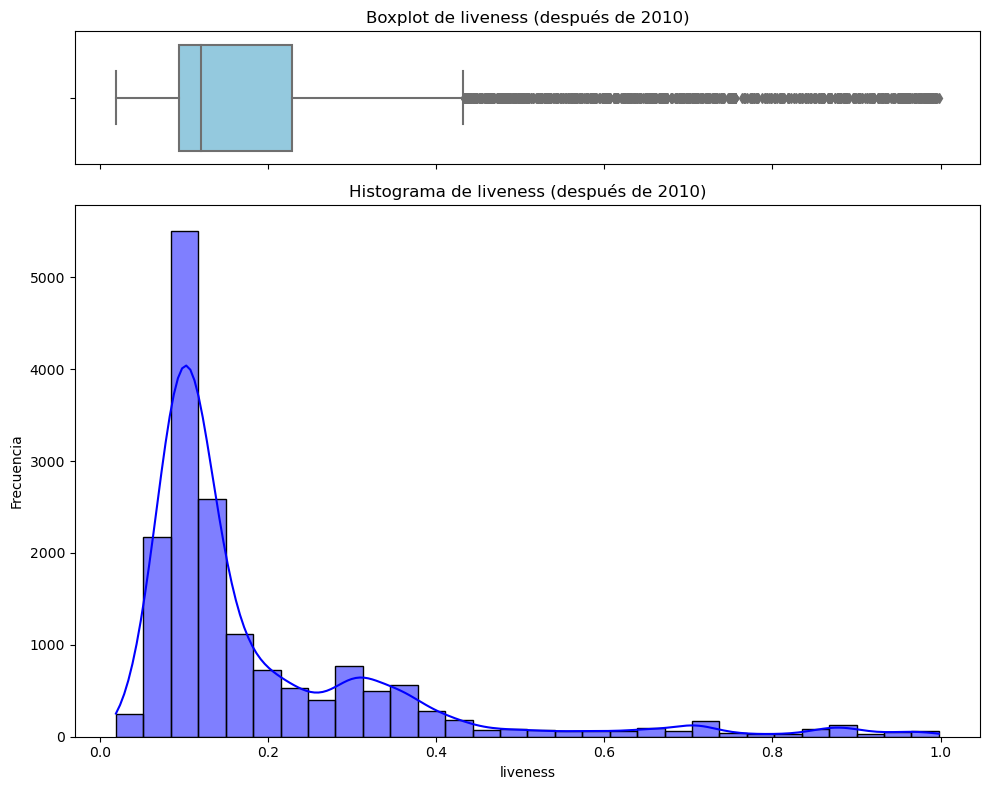

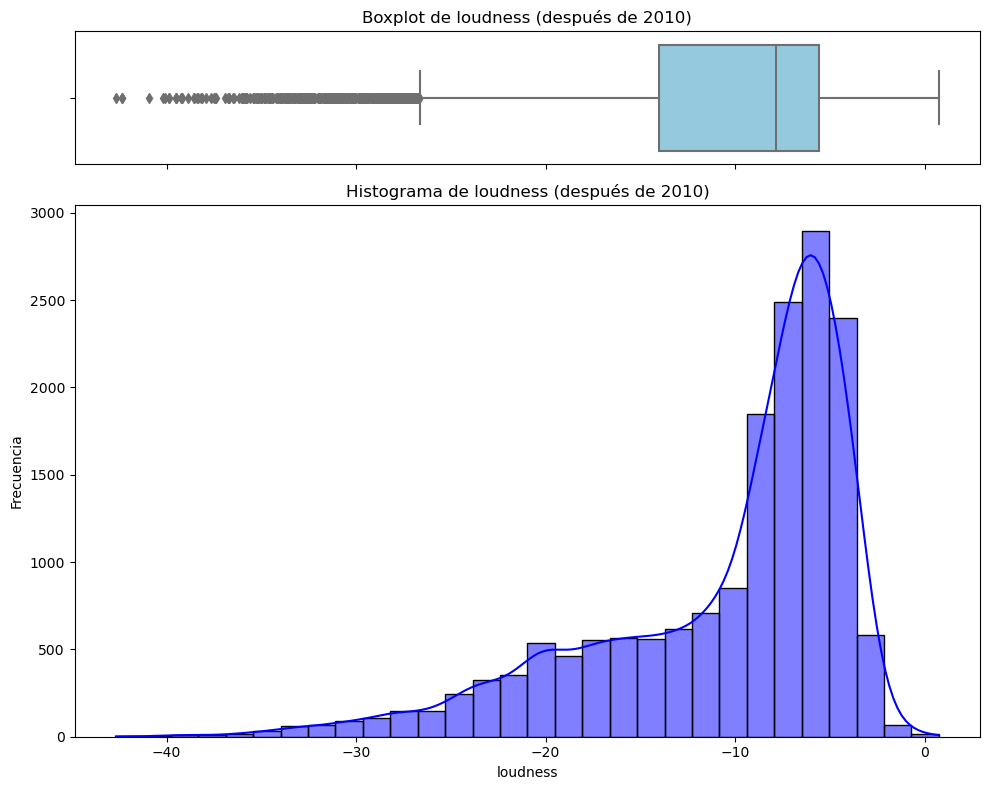

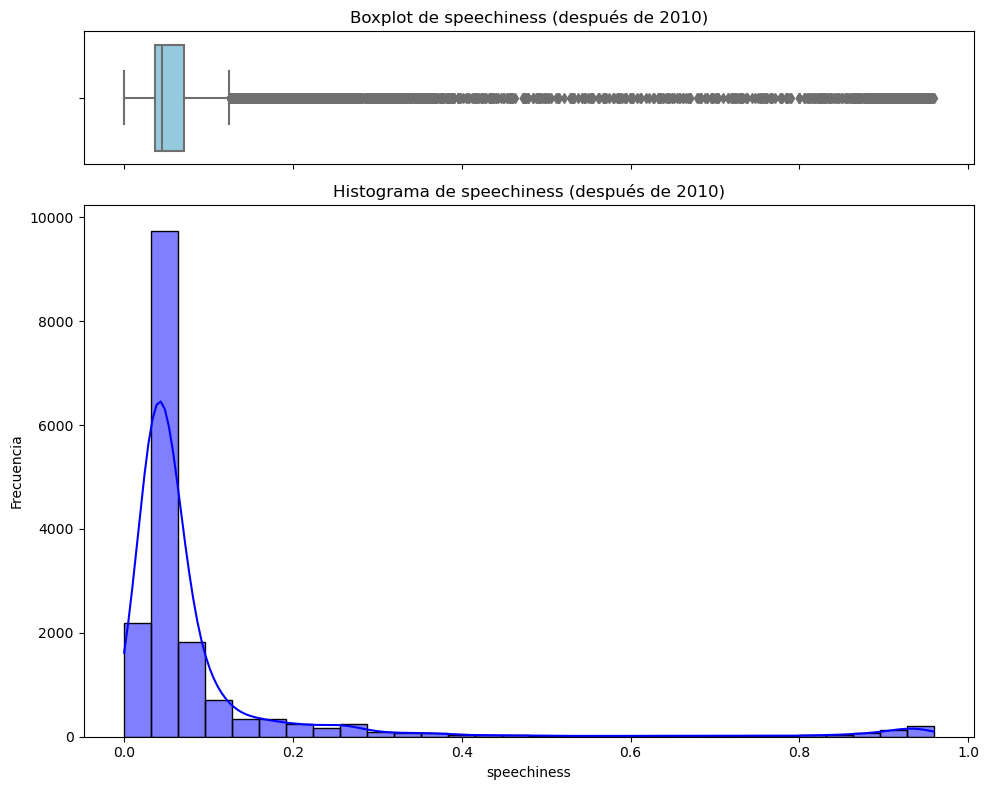

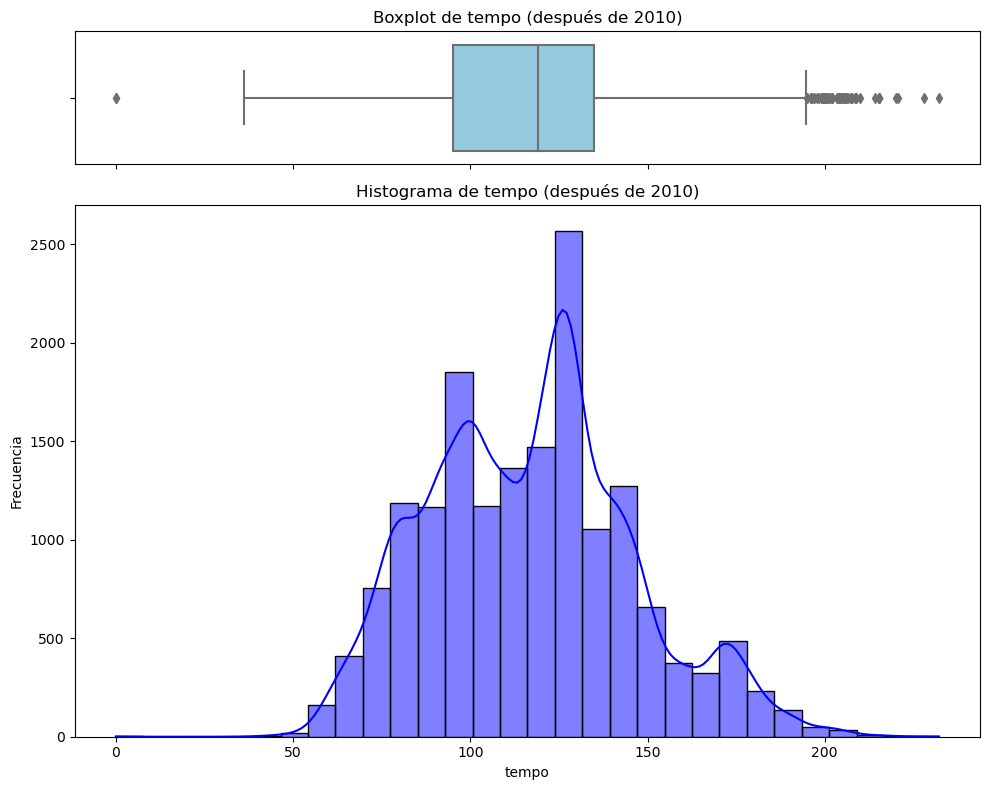

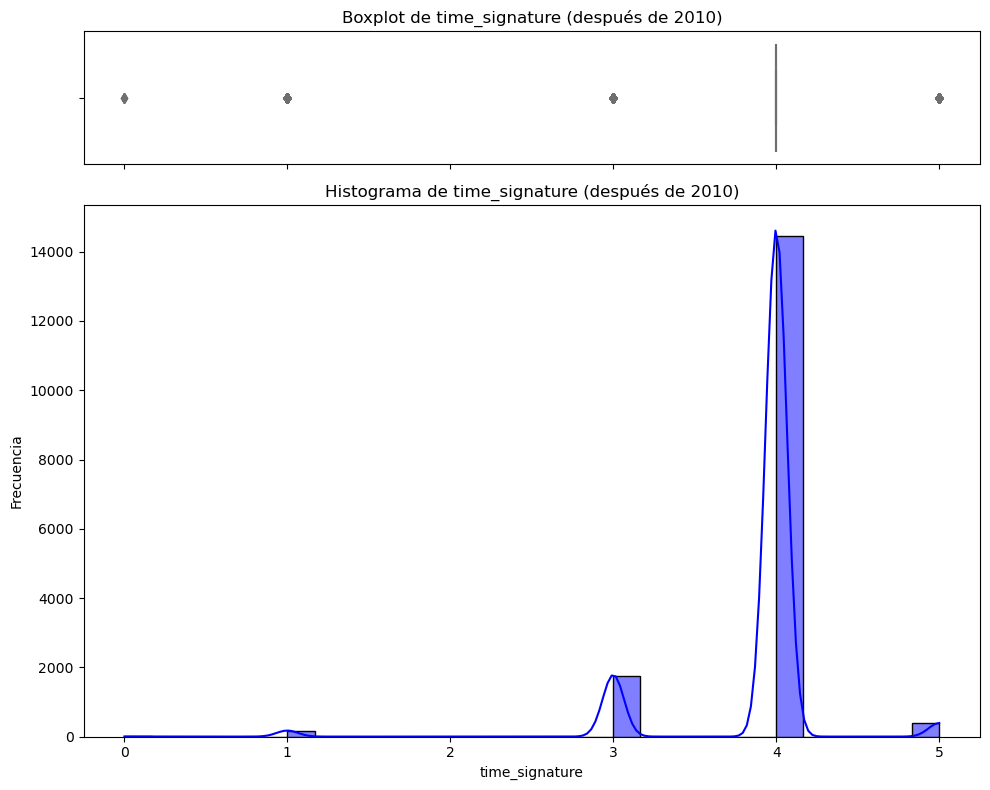

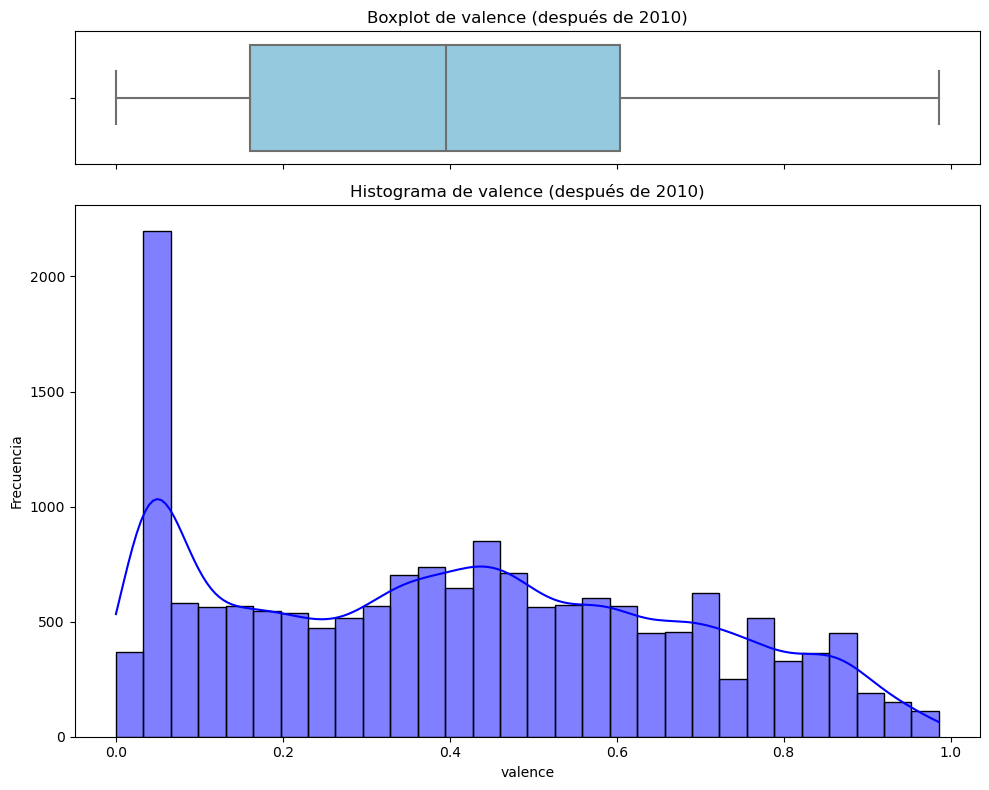

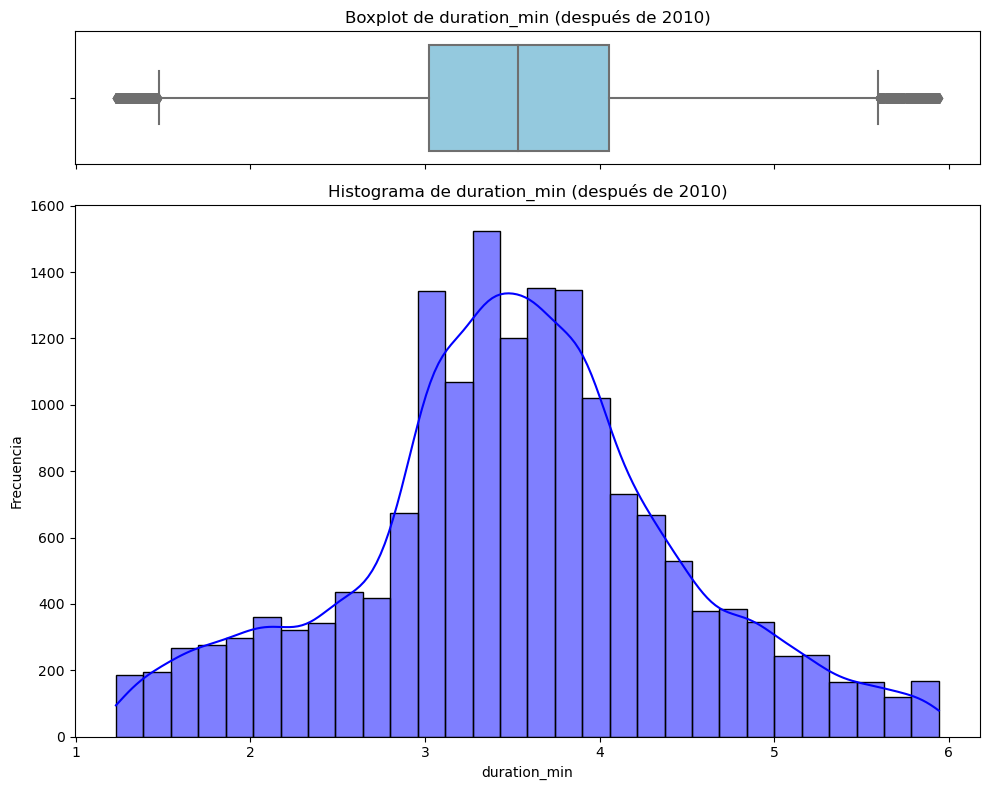

In [14]:
for col in numeric_columns:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 4]})
    
    # Boxplot
    sns.boxplot(data=df_filtered, x=col, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Boxplot de {col} (después de 2010)")
    axes[0].set_xlabel("")
    axes[0].tick_params(axis='x', labelbottom=False)

    # Histograma
    sns.histplot(df_filtered[col], bins=30, kde=True, ax=axes[1], color='blue')
    axes[1].set_title(f"Histograma de {col} (después de 2010)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frecuencia")

    # Ajustar el espacio entre subgráficos
    plt.tight_layout()
    plt.show()

### Correlación

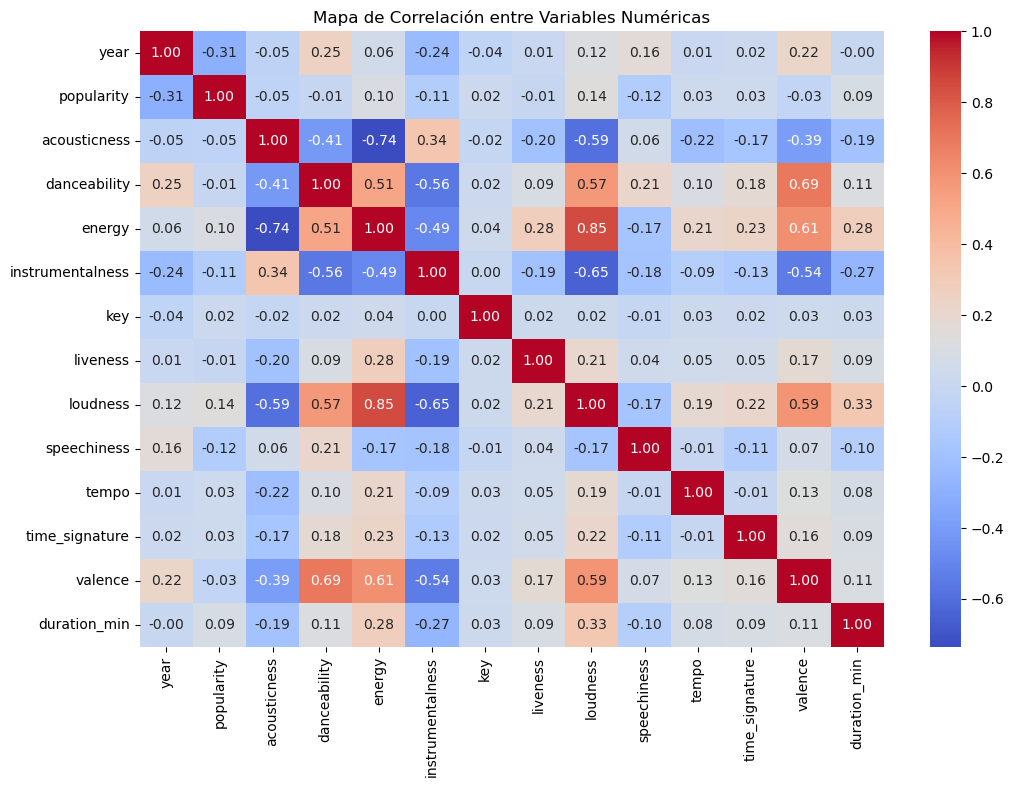

In [15]:
correlation_matrix = df_filtered[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()

In [16]:
df_filtered.to_csv("spotify_tracks_filtered.csv", index=False)

print("El archivo 'spotify_tracks_filtered.csv' ha sido guardado exitosamente.")

El archivo 'spotify_tracks_filtered.csv' ha sido guardado exitosamente.
